# we get a lot of tracks with an adc peak at zero. look at why

In [1]:
!pip install uproot awkward 
from uproot_io import Events, View
import numpy as np
import matplotlib.pyplot as plt
import features as f

cheated_0 = Events('CheatedRecoFile_0.root')

# we have 499617 events in cheated_0

In [2]:
# looking at why tracks give weird adc peaks at the start...

# find some track examples to iterate over
track_idx = []
for idx in range(0,19999):
    w_hits = cheated_0.reco_hits_w[idx]
    if len(w_hits) > 1500:
        print(f'index {idx} has {len(w_hits)} hits.')
        if cheated_0.is_true_track[idx]:
            track_idx.append(idx)

print(track_idx)

index 260 has 2940 hits.
index 819 has 2082 hits.
index 1097 has 1798 hits.
index 1554 has 2157 hits.
index 1562 has 2816 hits.
index 2803 has 2019 hits.
index 3531 has 1597 hits.
index 3788 has 2288 hits.
index 3983 has 1713 hits.
index 4061 has 3079 hits.
index 4108 has 1743 hits.
index 4566 has 1643 hits.
index 4674 has 2493 hits.
index 4686 has 2208 hits.
index 5319 has 1632 hits.
index 6003 has 2105 hits.
index 6765 has 2012 hits.
index 7175 has 2973 hits.
index 7638 has 1870 hits.
index 7848 has 1635 hits.
index 8160 has 2240 hits.
index 8770 has 2437 hits.
index 10342 has 2389 hits.
index 10848 has 1823 hits.
index 11308 has 1851 hits.
index 11500 has 2389 hits.
index 11558 has 2745 hits.
index 11820 has 2899 hits.
index 12012 has 2269 hits.
index 12022 has 2053 hits.
index 12258 has 2157 hits.
index 13890 has 1983 hits.
index 14348 has 2270 hits.
index 14784 has 1558 hits.
index 14834 has 1862 hits.
index 15257 has 1552 hits.
index 18197 has 1567 hits.
index 18308 has 1755 hits

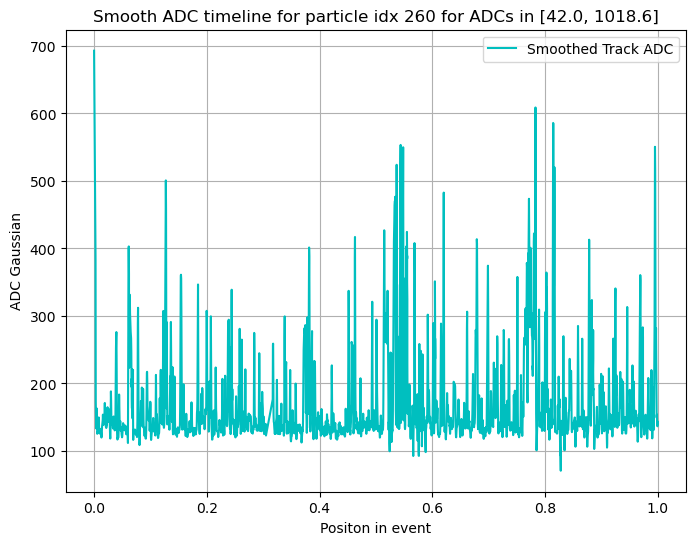

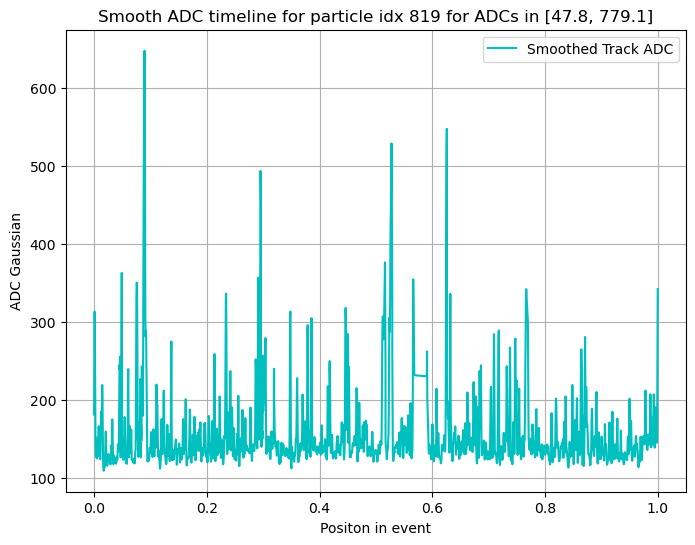

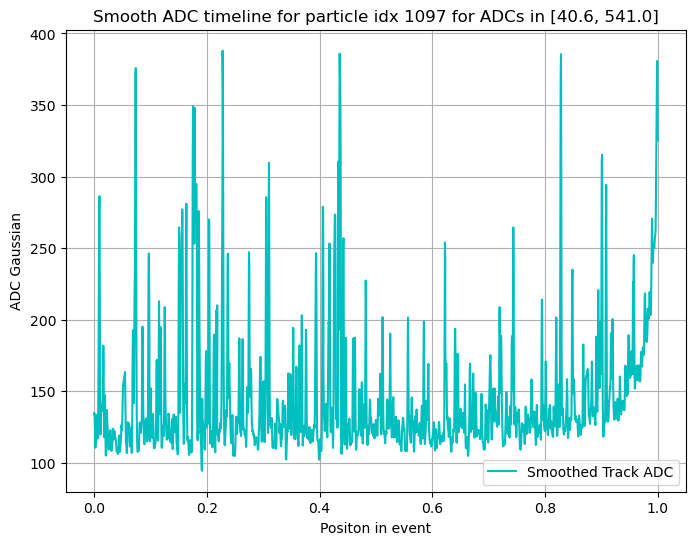

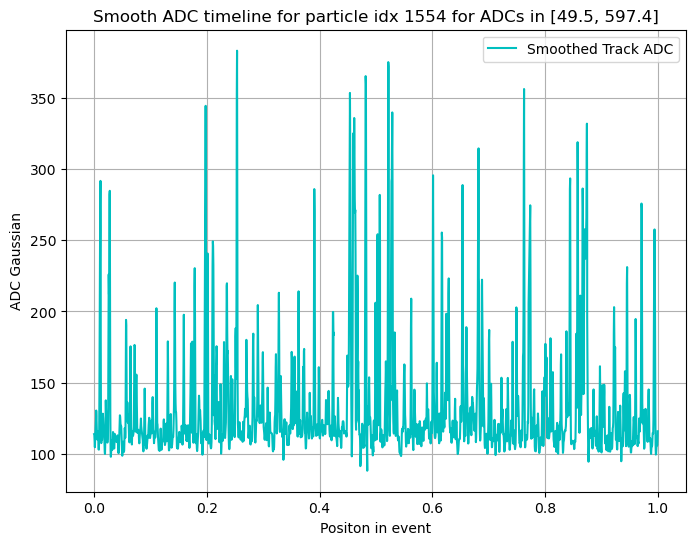

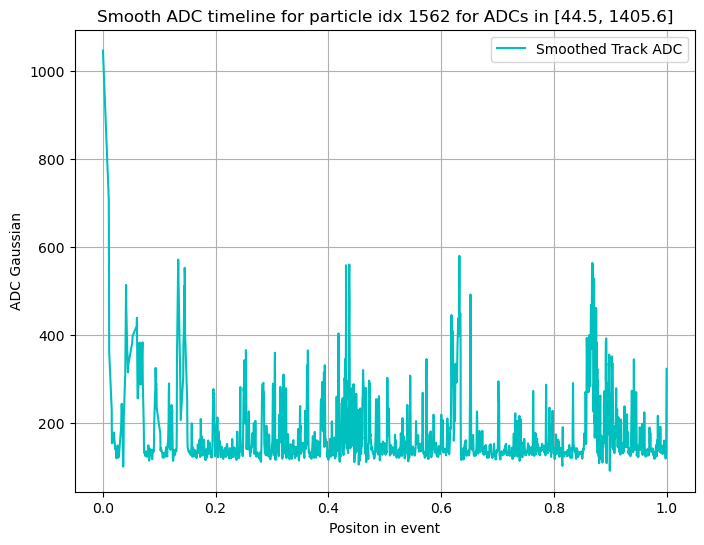

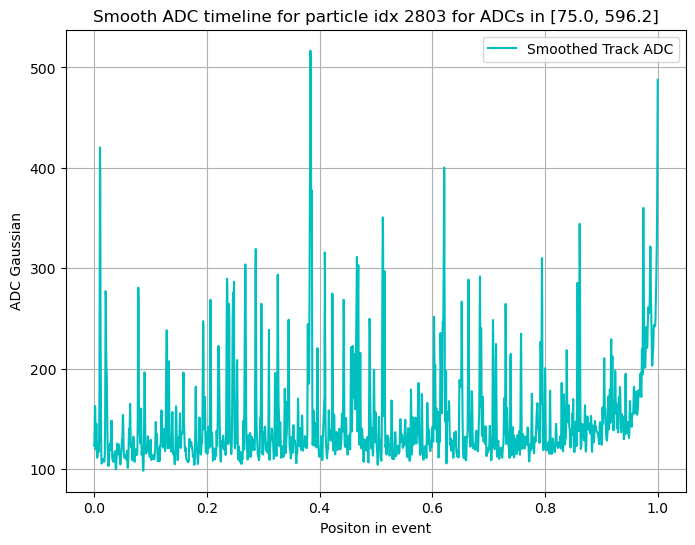

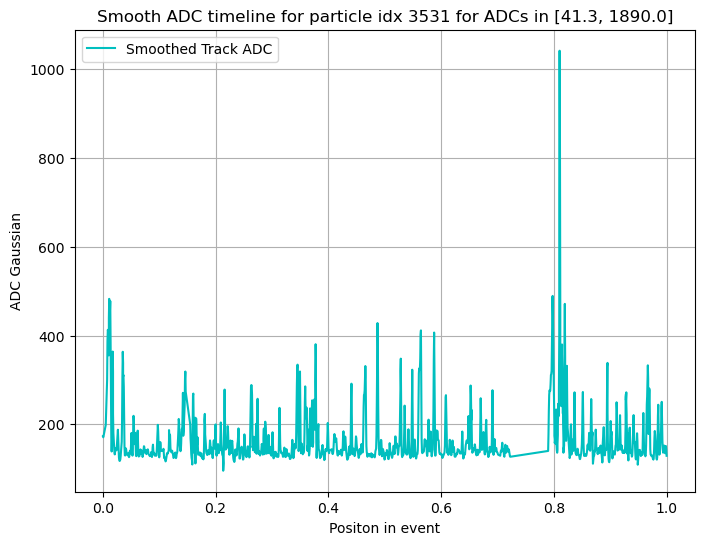

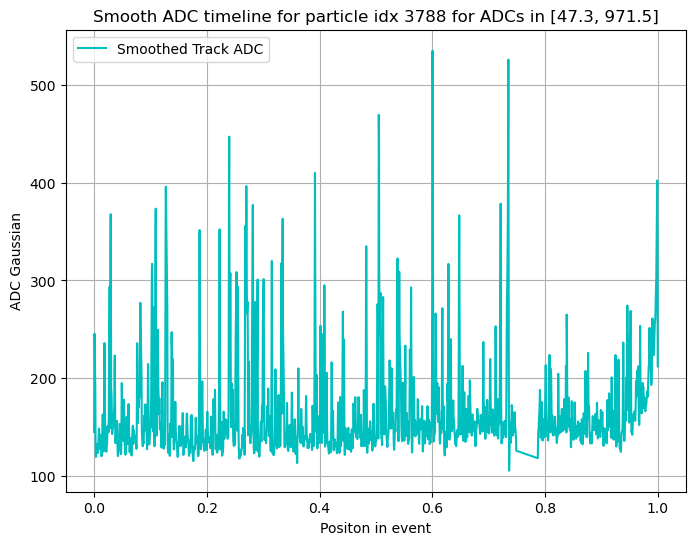

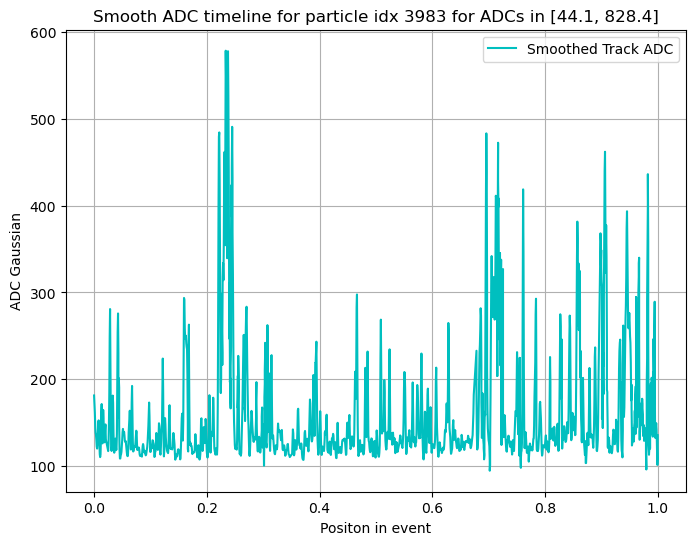

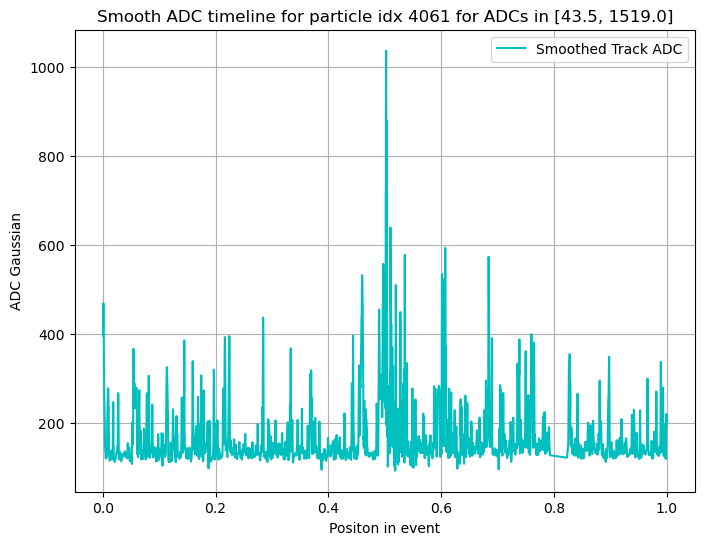

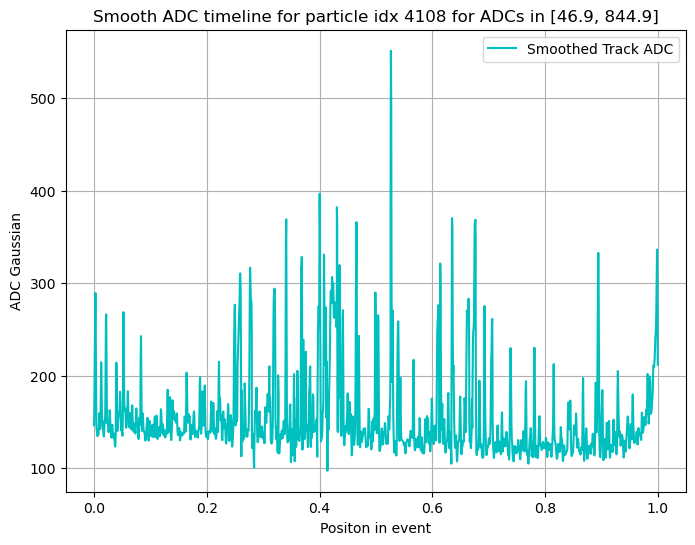

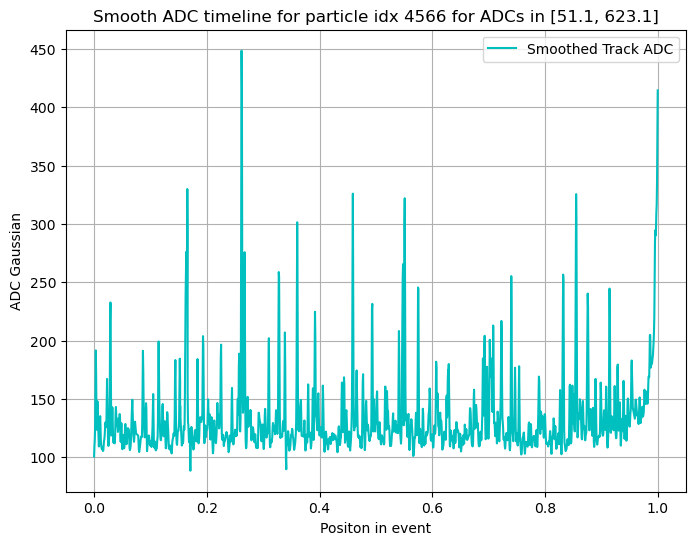

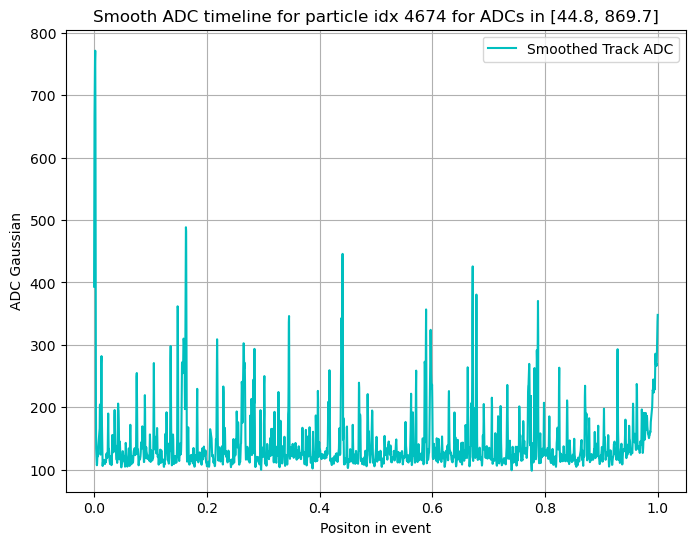

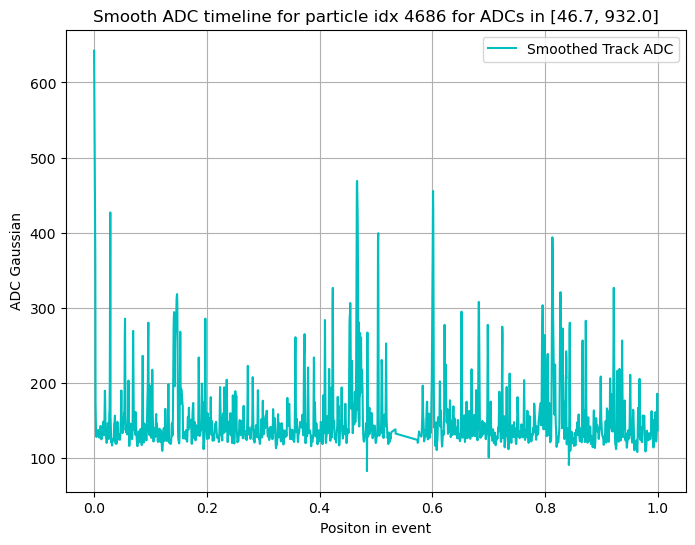

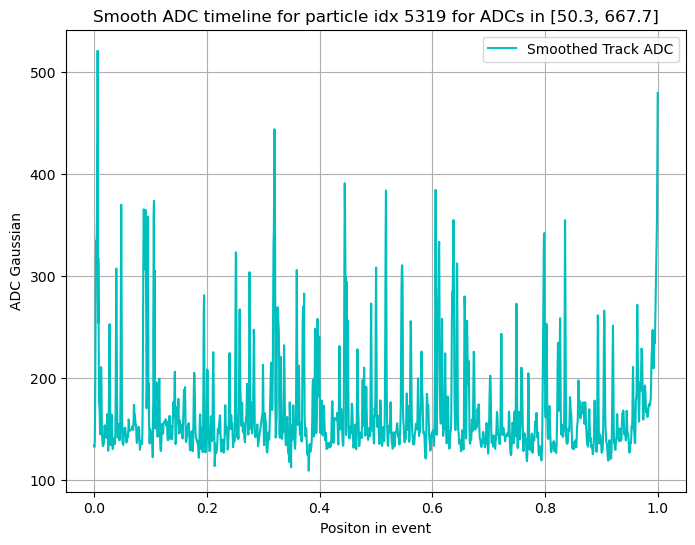

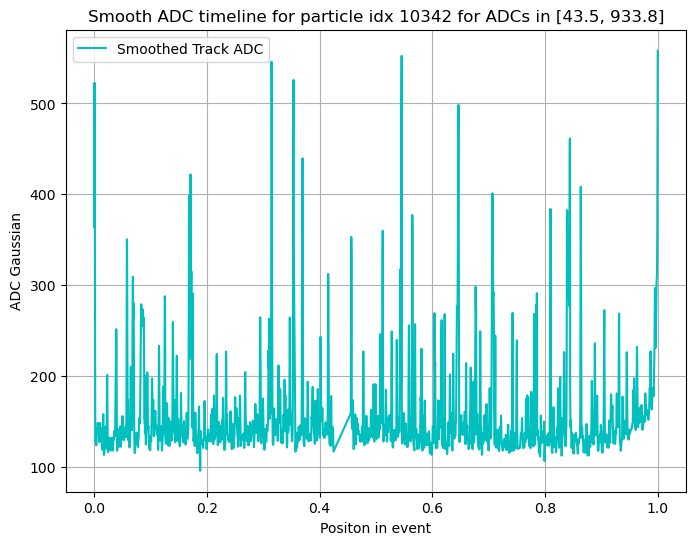

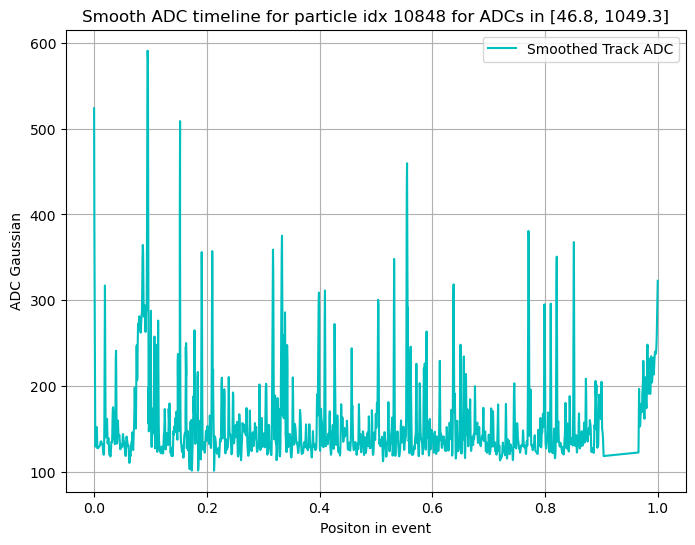

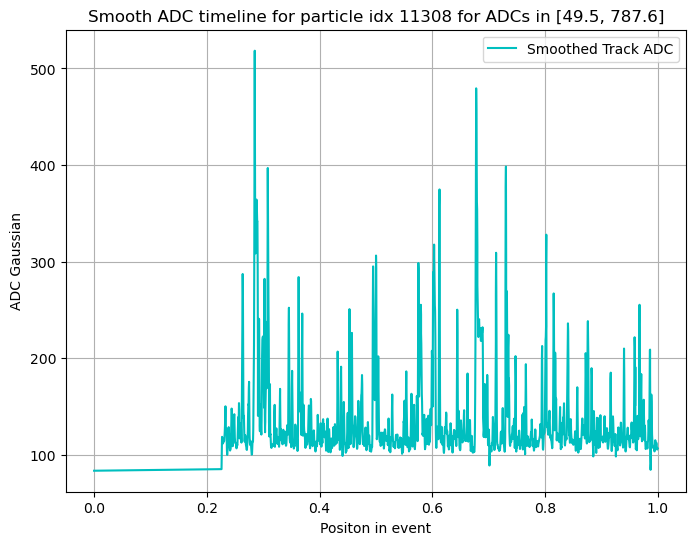

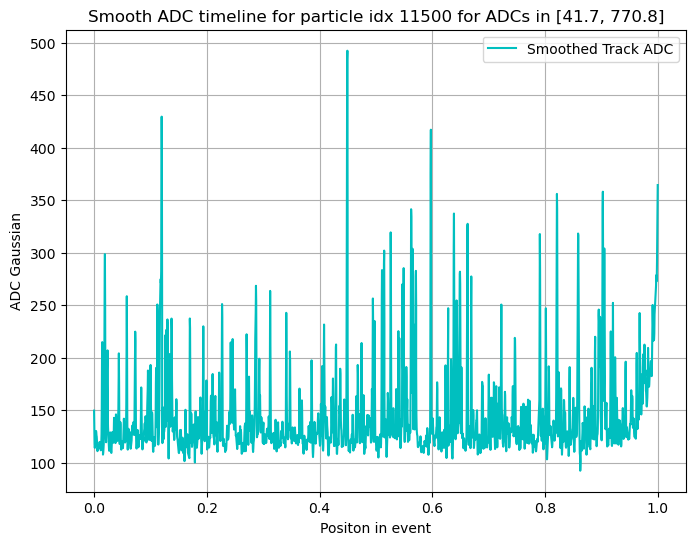

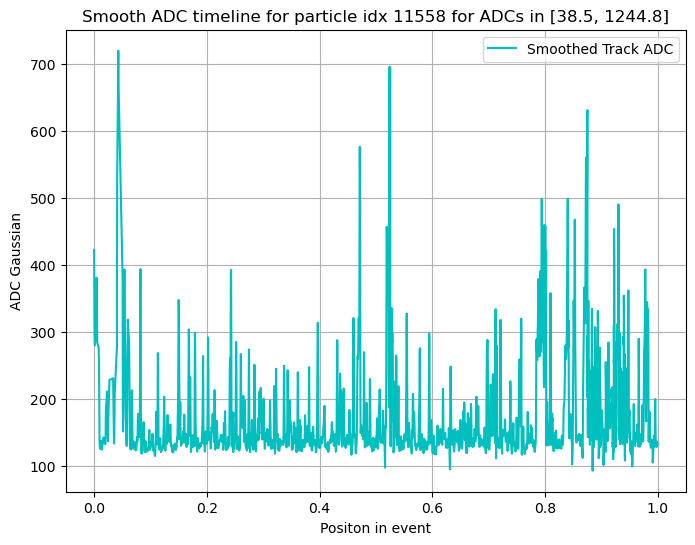

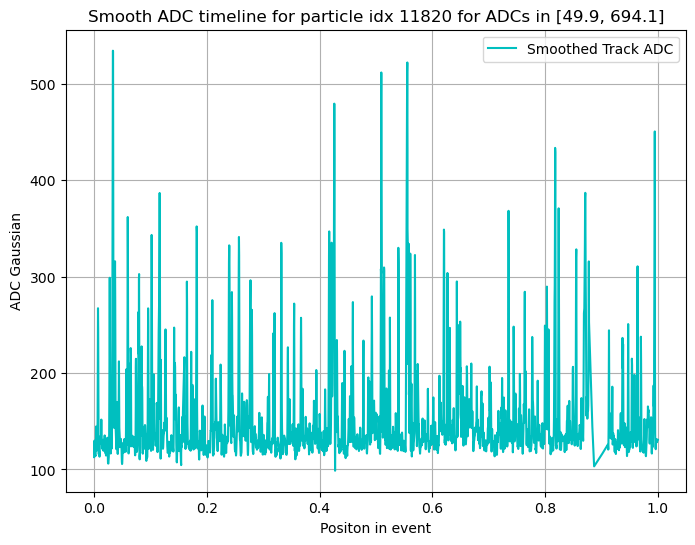

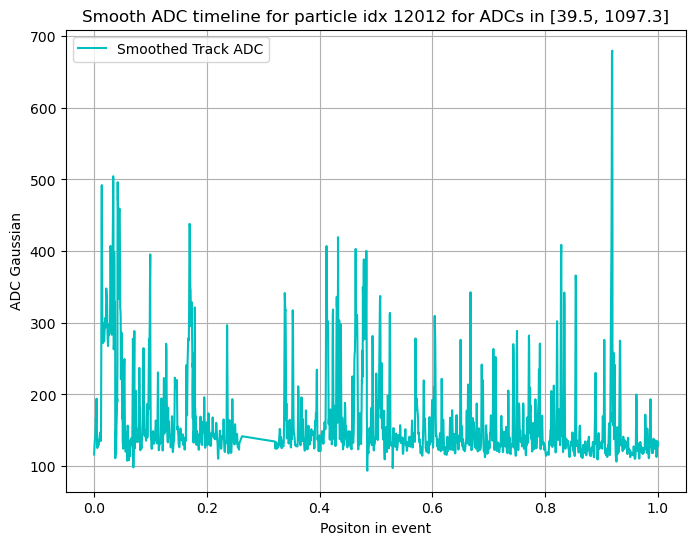

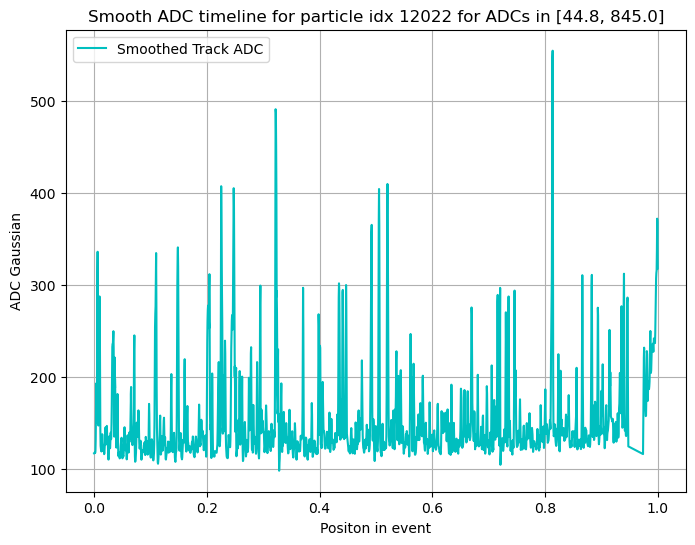

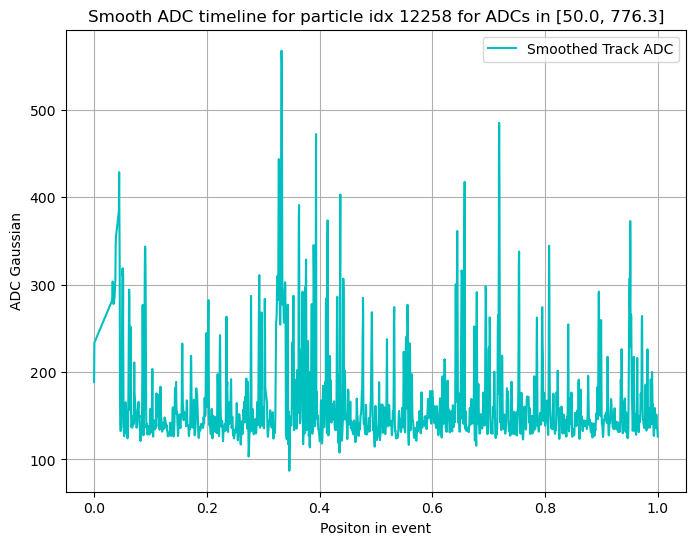

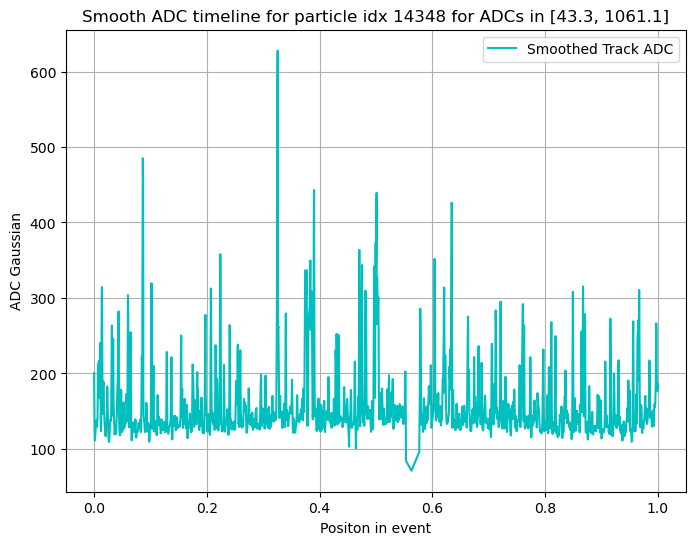

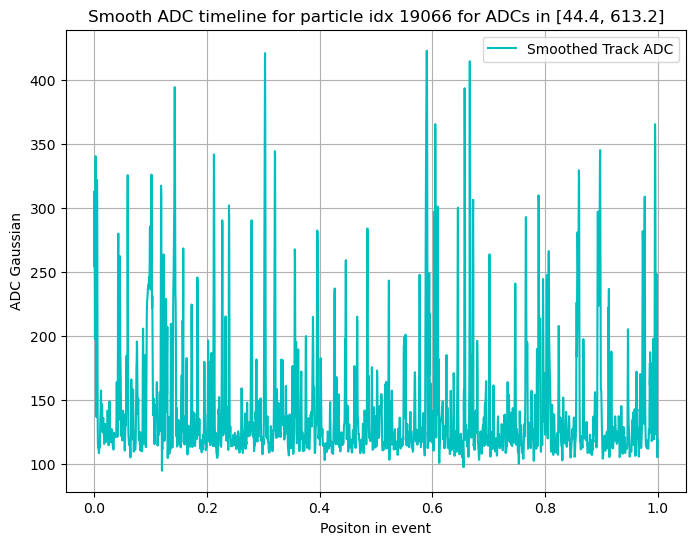

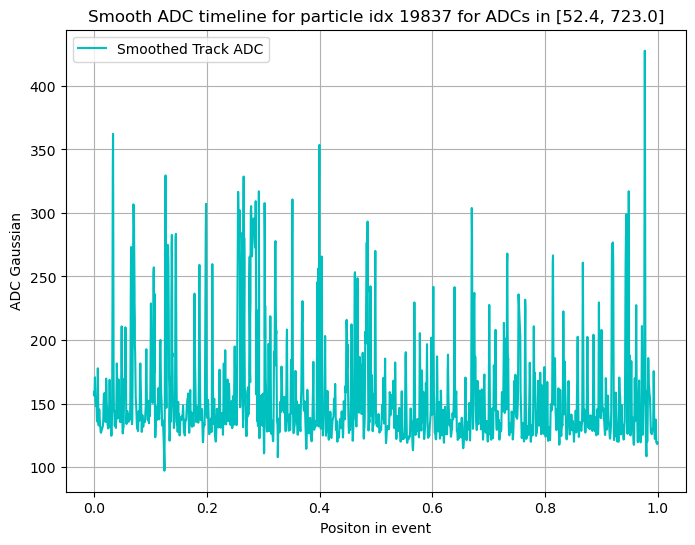

In [3]:
from scipy.ndimage import gaussian_filter1d
for i in track_idx:
    f.smooth_adc_plot_pdg(cheated_0, i, 0, 1)

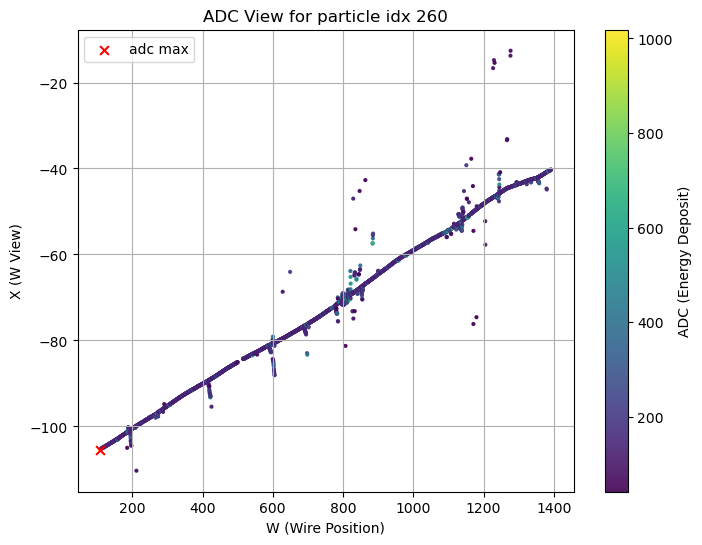

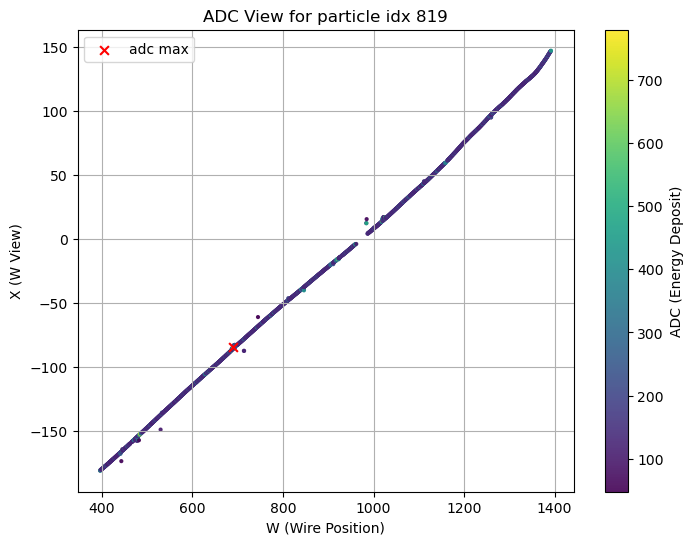

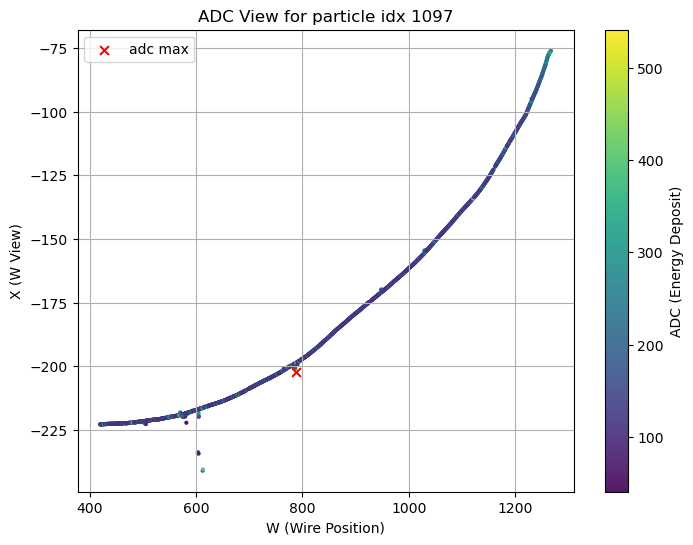

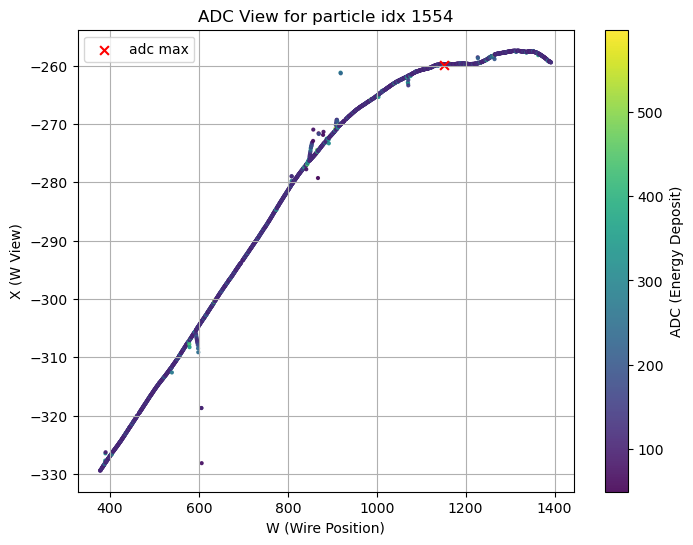

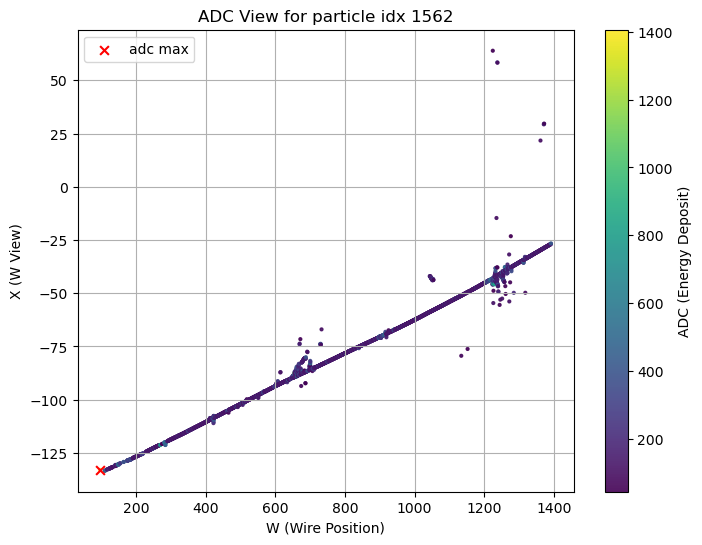

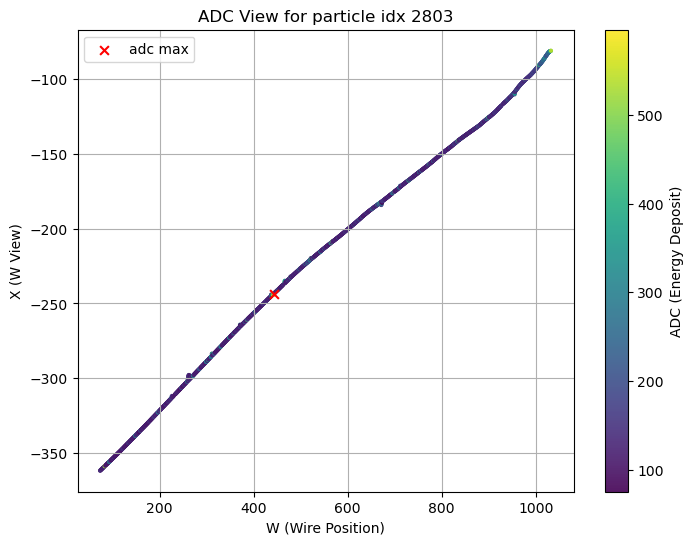

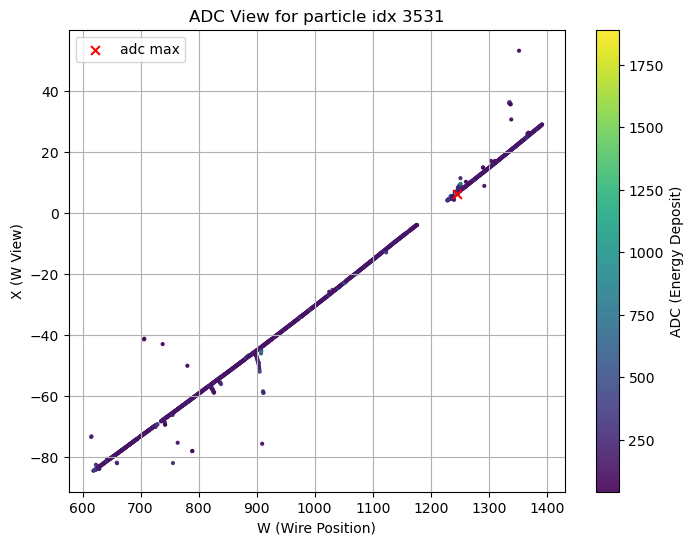

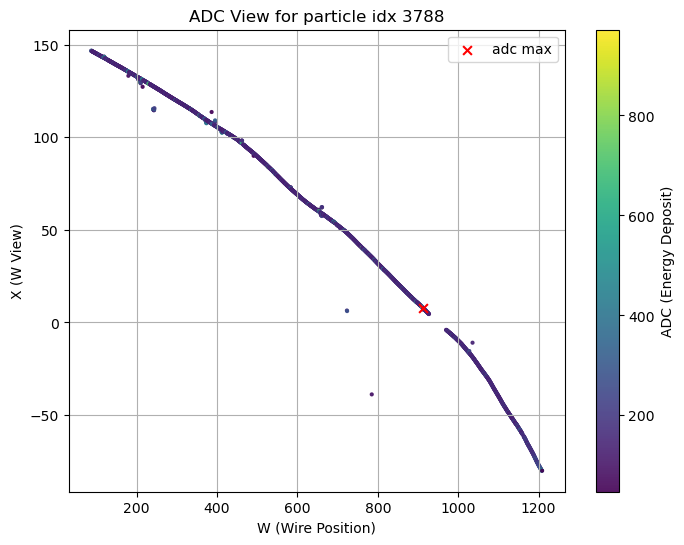

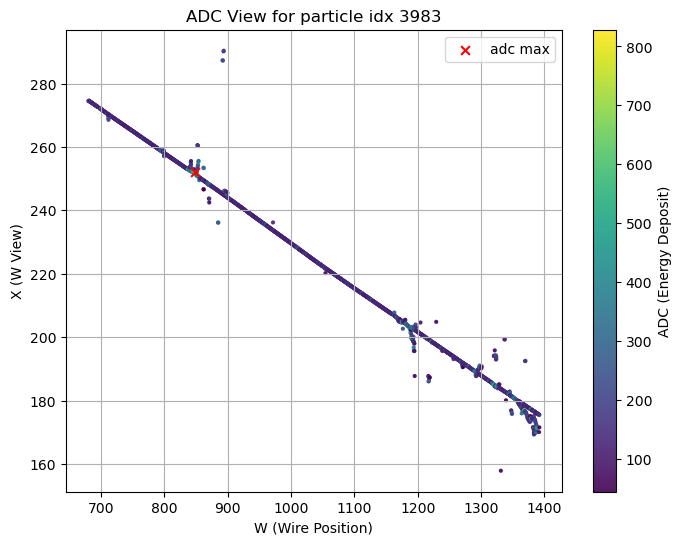

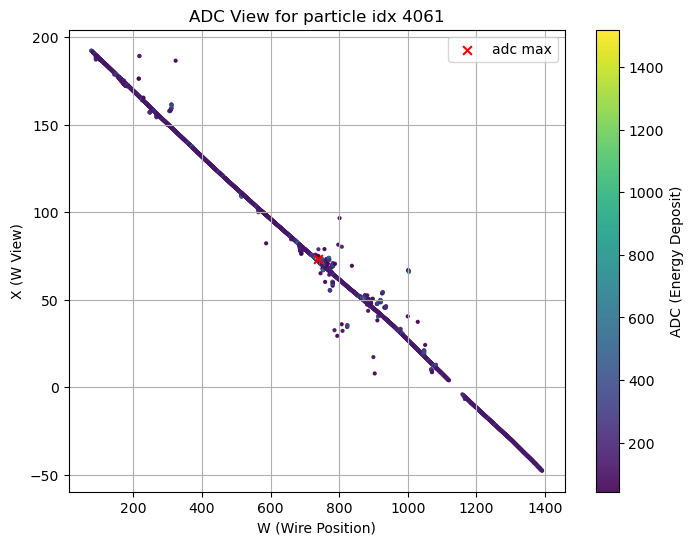

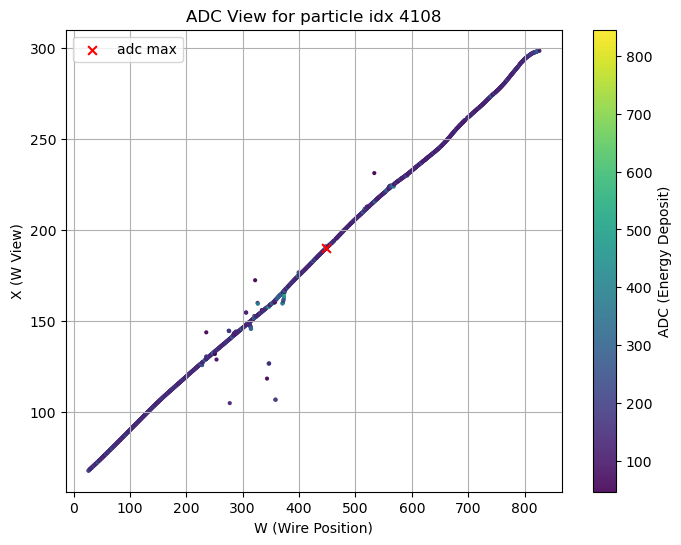

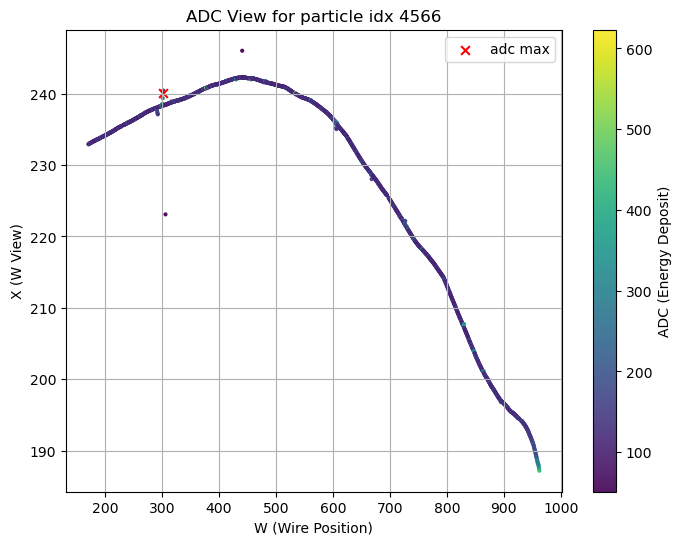

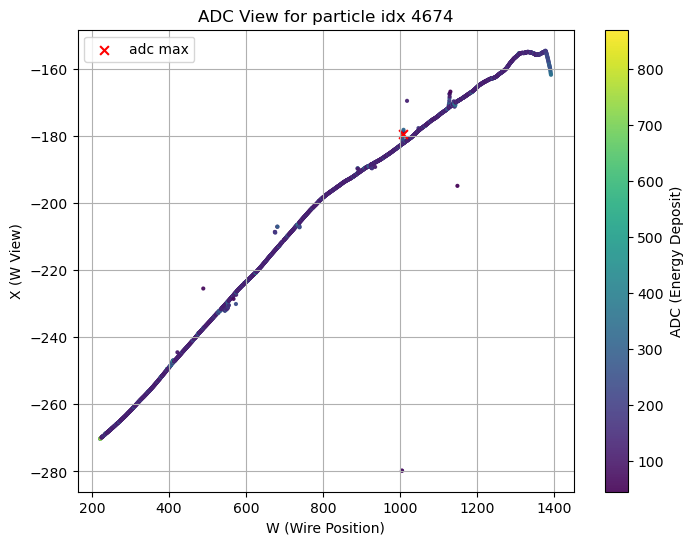

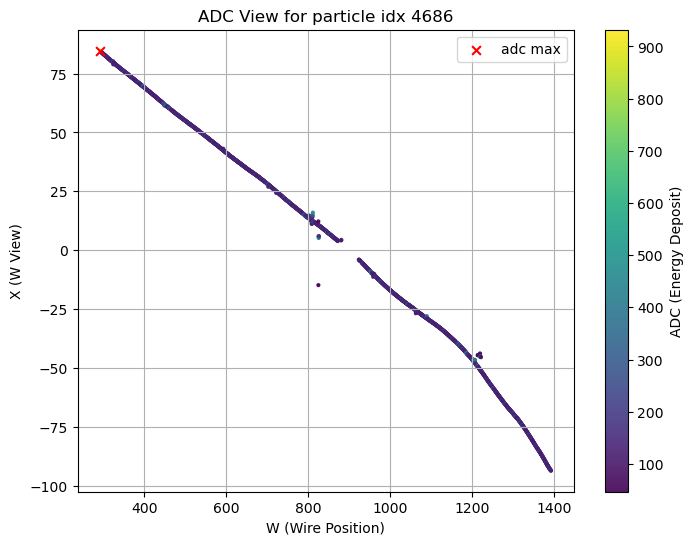

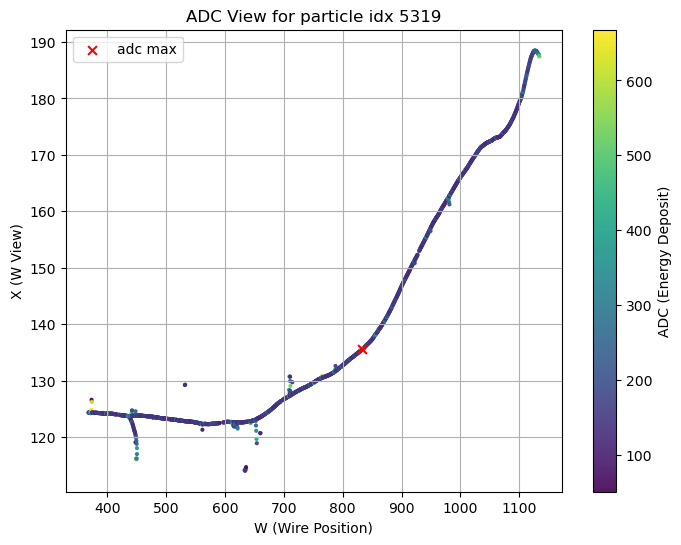

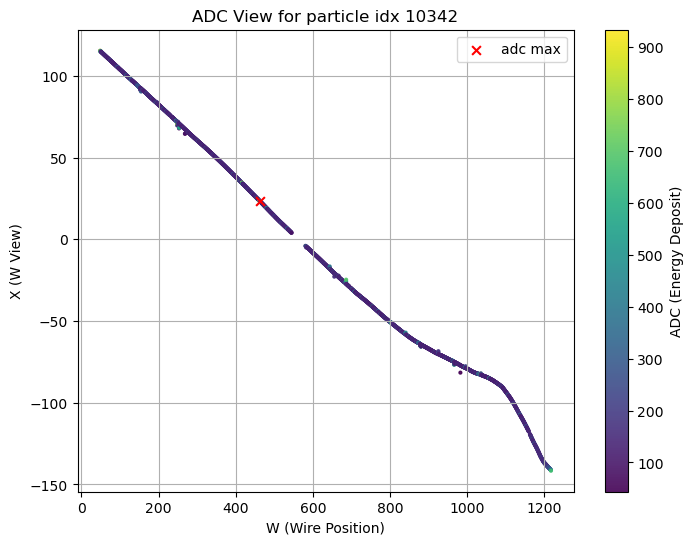

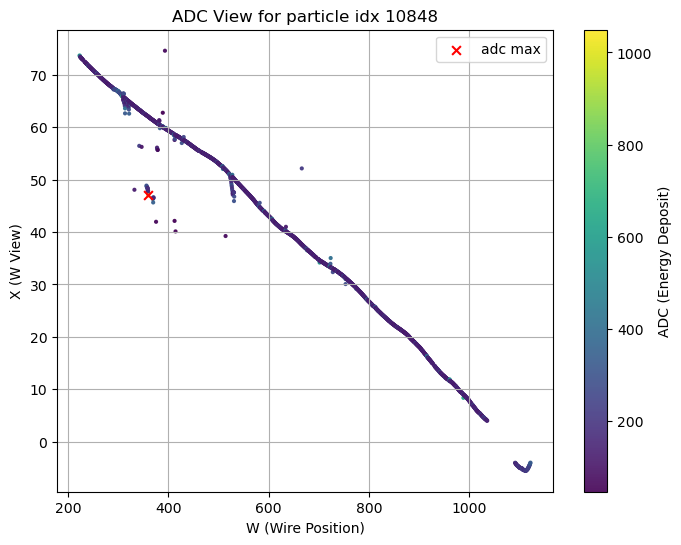

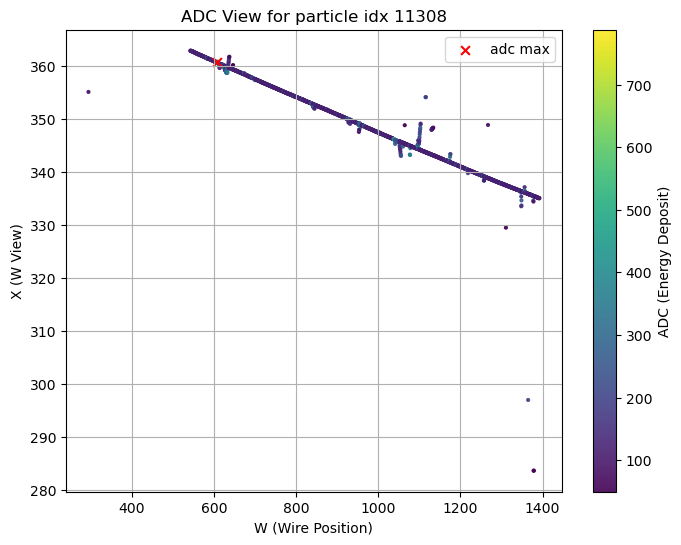

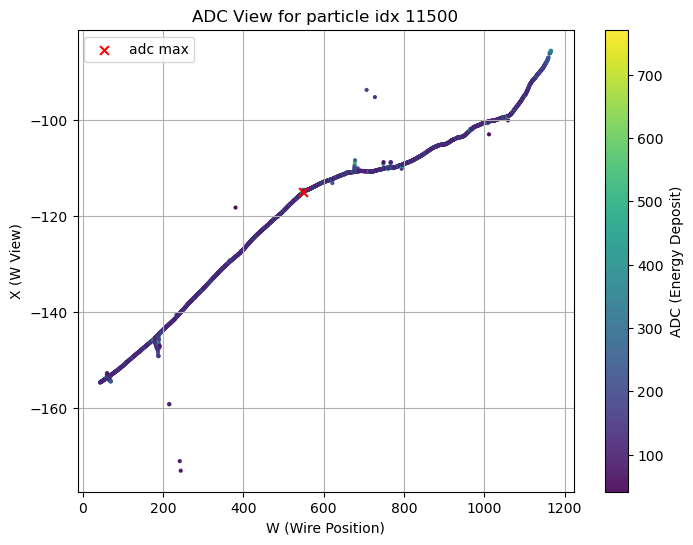

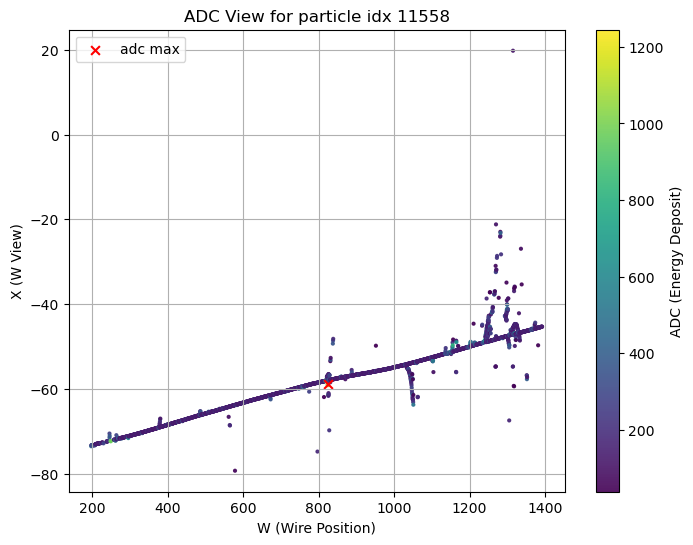

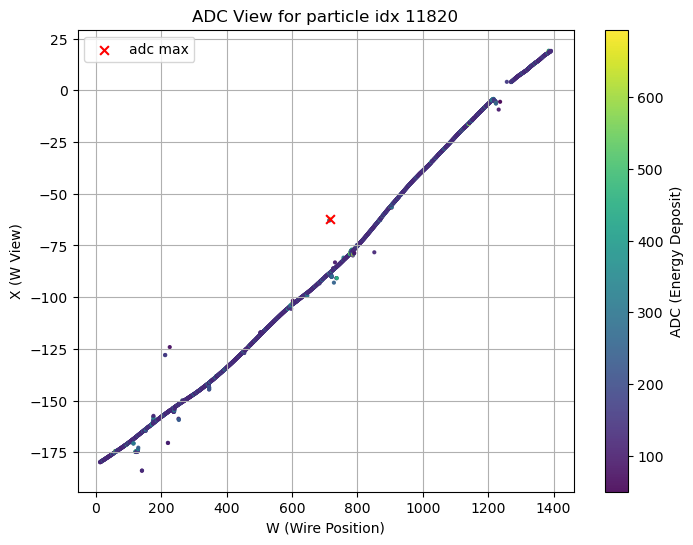

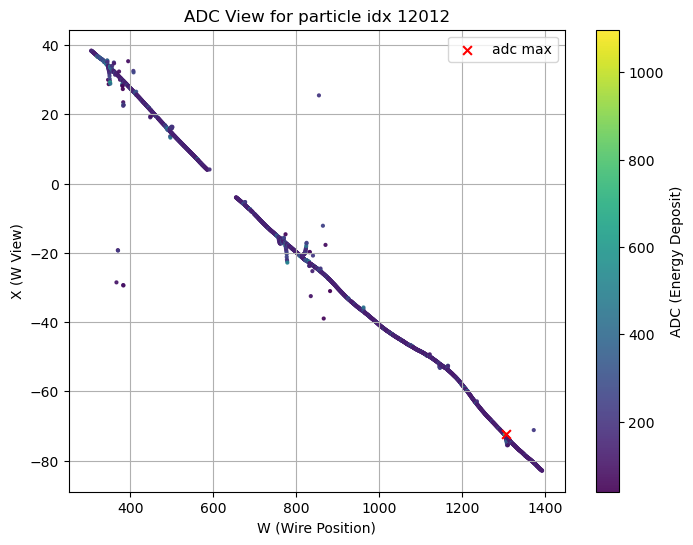

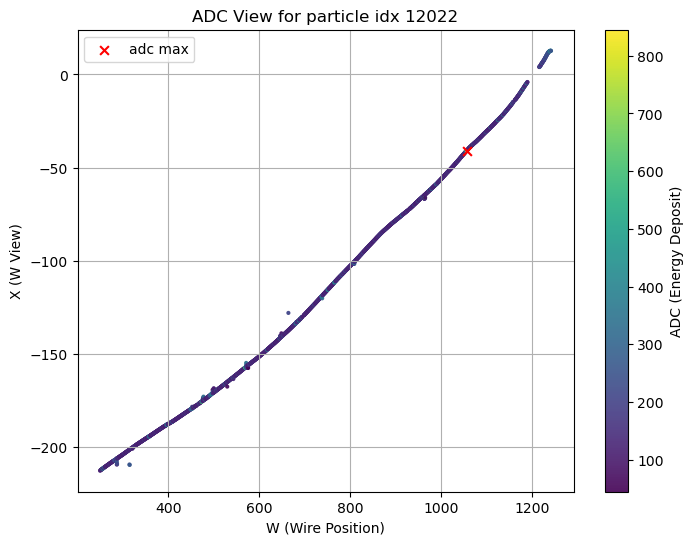

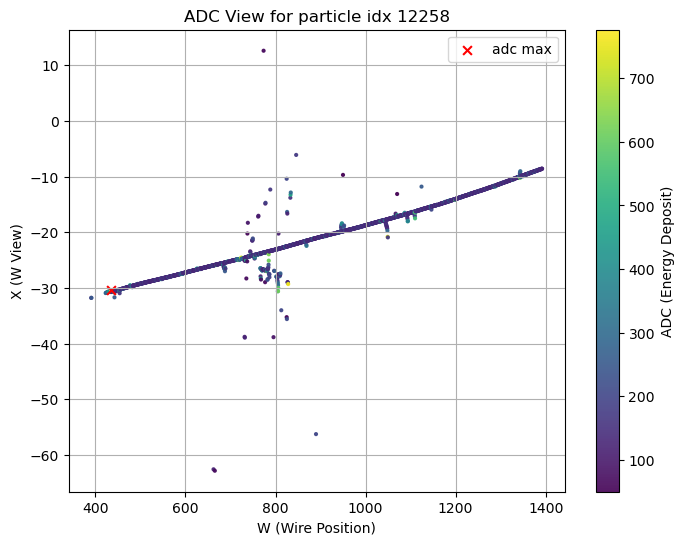

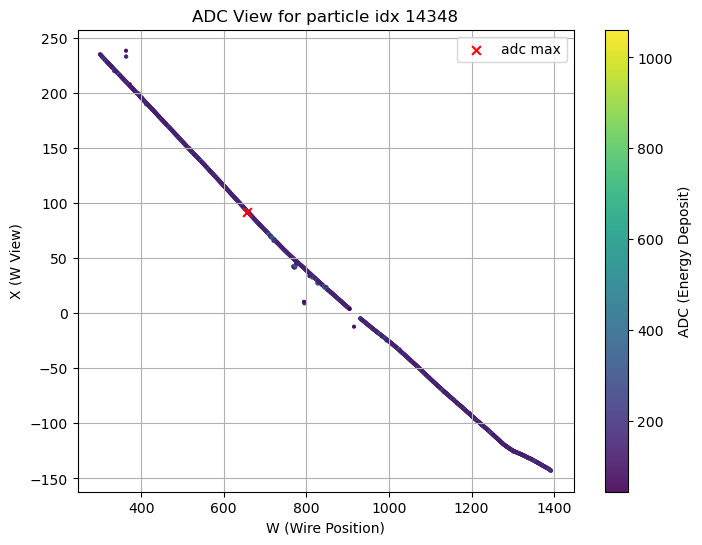

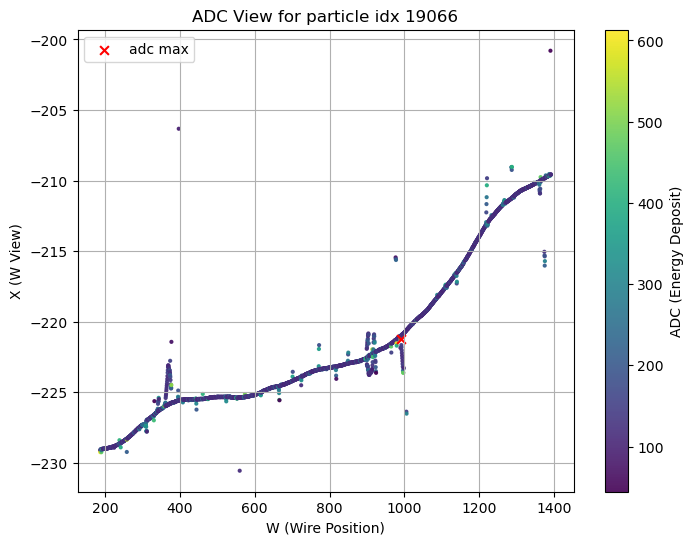

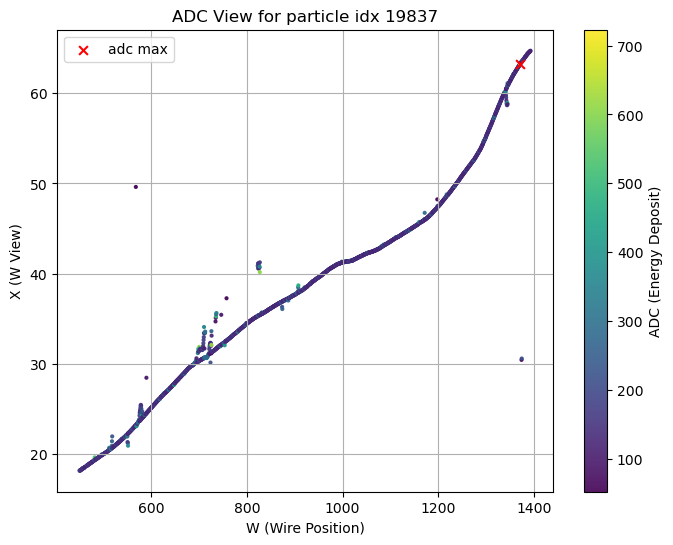

In [4]:
def plot_idx_adc_max(events, event_idx):
    
    # finding x/w hits again for a single event
    w_hits = events.reco_hits_w[event_idx]
    x_hits = events.reco_hits_x_w[event_idx]
    adc_values = events.reco_adcs_w[event_idx]
    adc_max = max(adc_values)

    max_idx = np.where(adc_values == adc_max)[0][0]

    if len(w_hits) == len(x_hits) and len(w_hits) > 5:
        plt.figure(figsize = (8,6))
        scatter = plt.scatter(w_hits, x_hits, c=adc_values, cmap='viridis', s=4, alpha=0.9) # scatter plot
        plt.colorbar(scatter, label='ADC (Energy Deposit)') # Generating Colour Bar
        plt.scatter(w_hits[max_idx], x_hits[max_idx], c='r', marker='x', s=40, label='adc max')
        plt.title(f'ADC View for particle idx {event_idx}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.grid(True)
        plt.legend()
        plt.show()
    else: return print('Less that 5 hits in event, not sufficient to plot.')

for i in track_idx:
    plot_idx_adc_max(cheated_0, i)

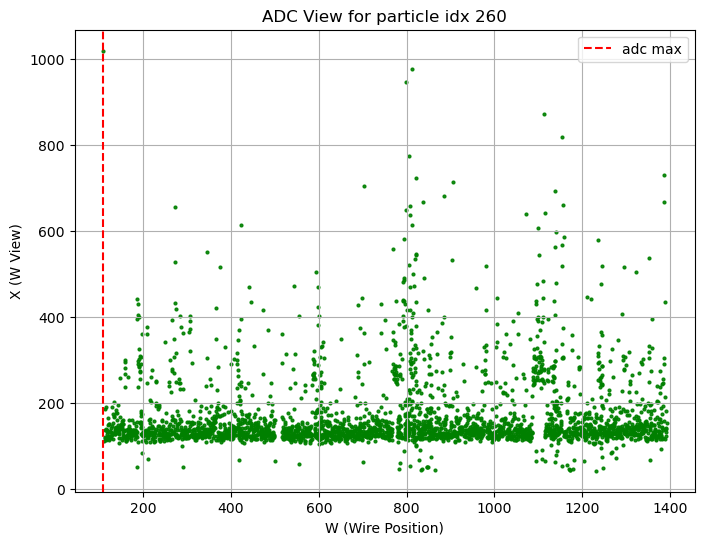

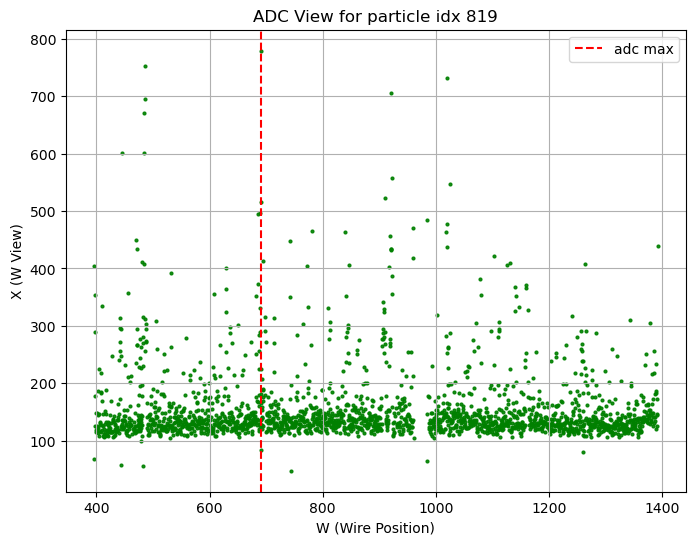

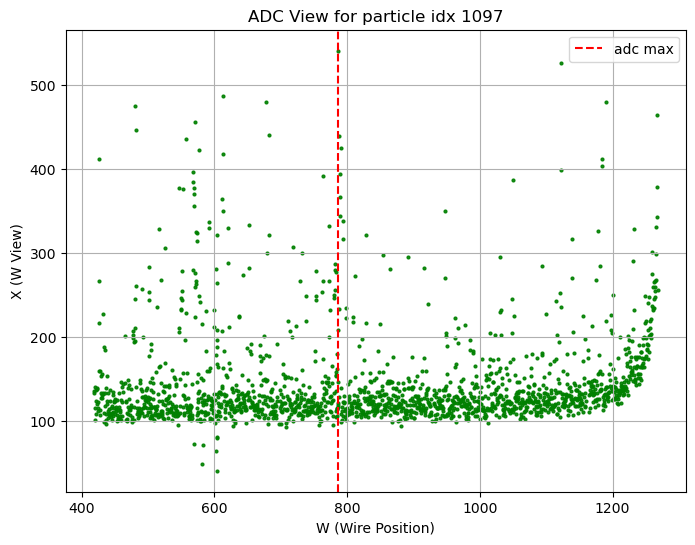

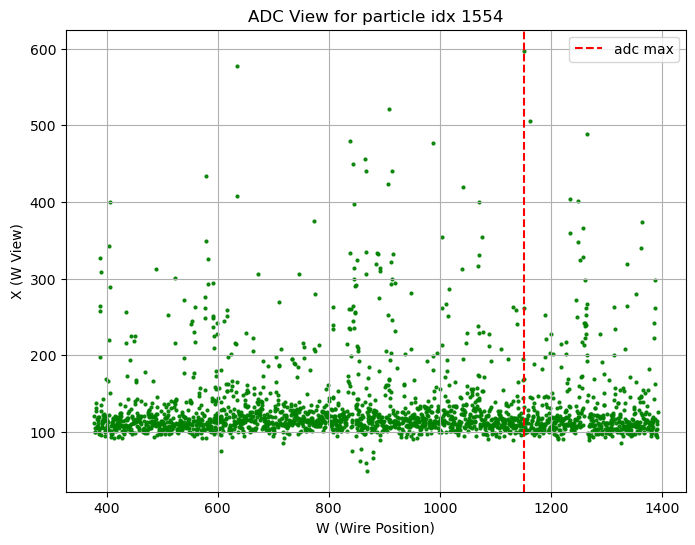

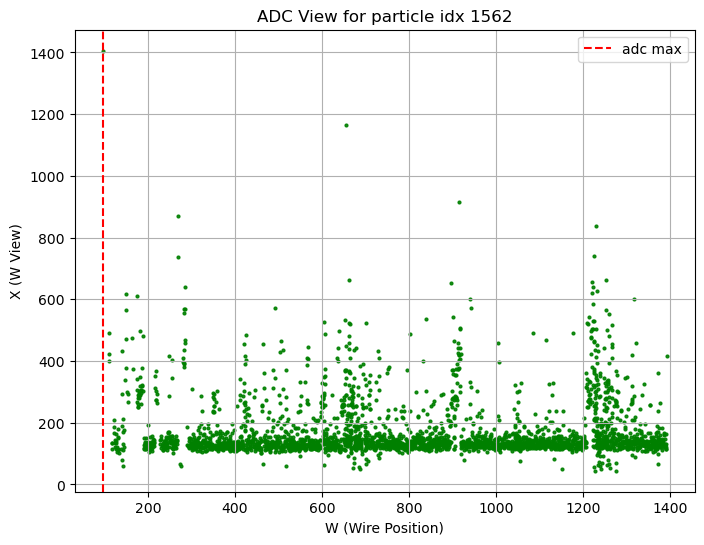

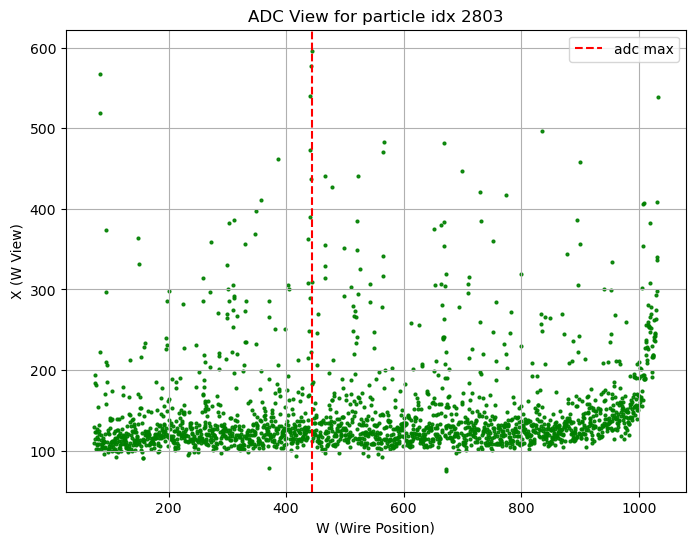

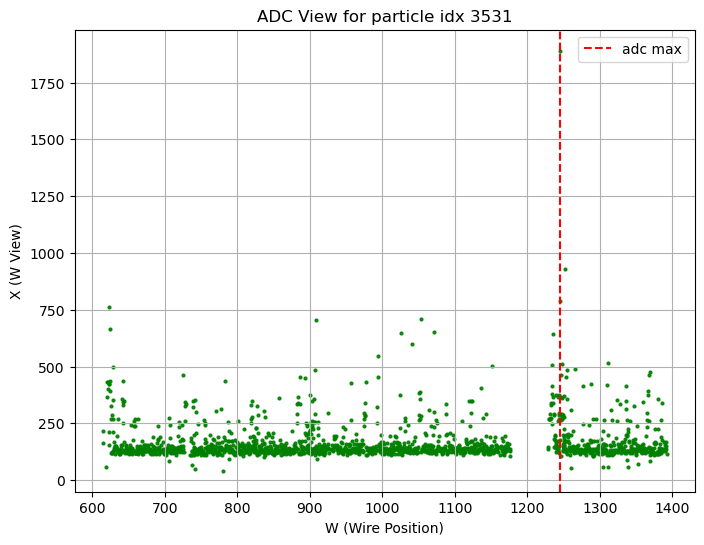

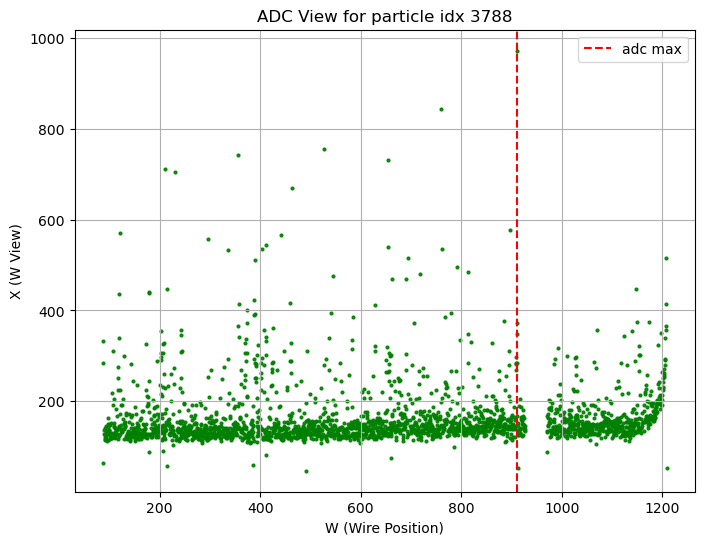

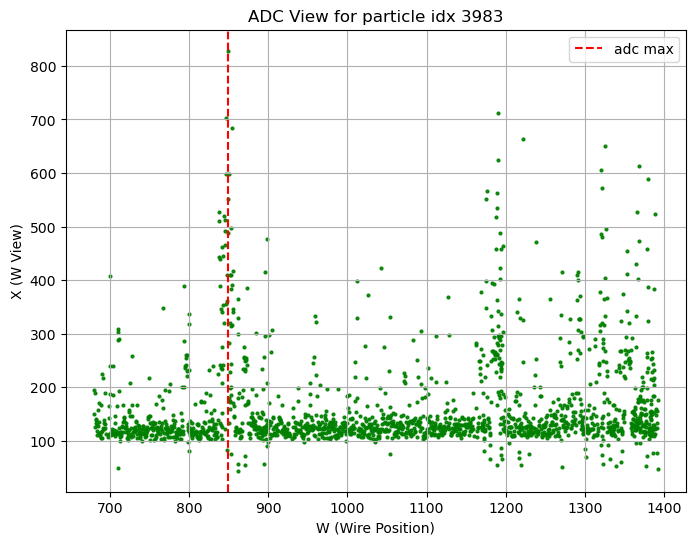

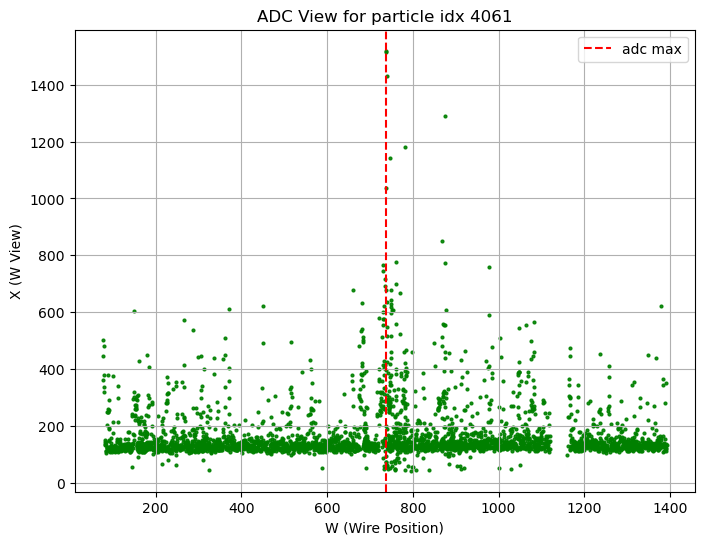

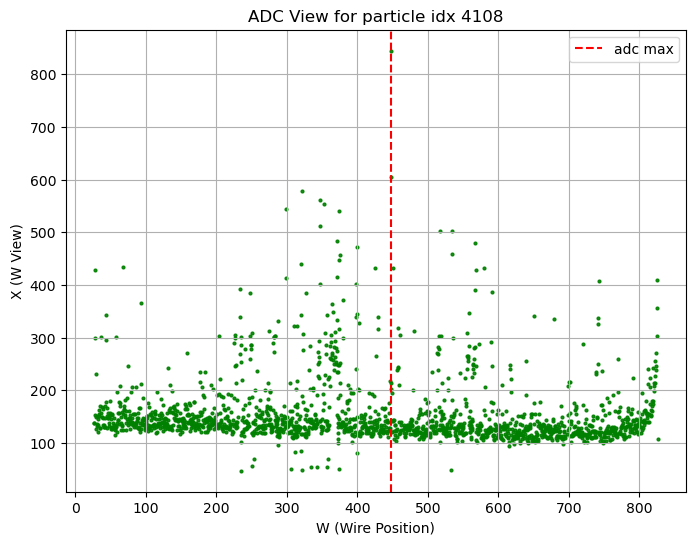

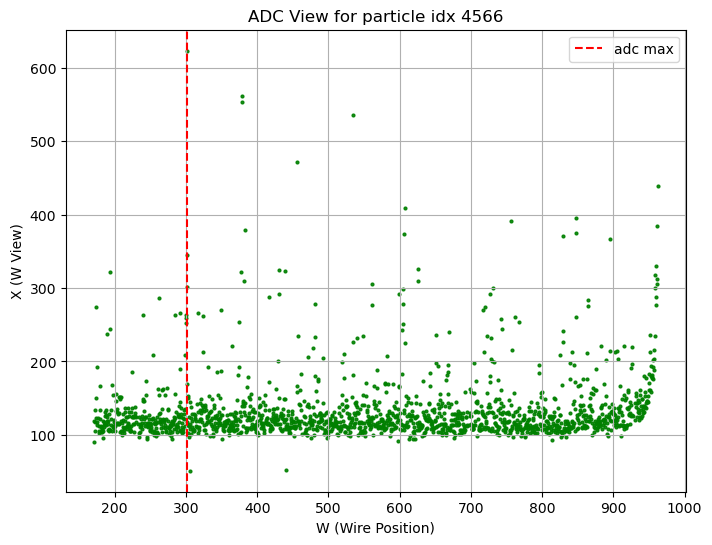

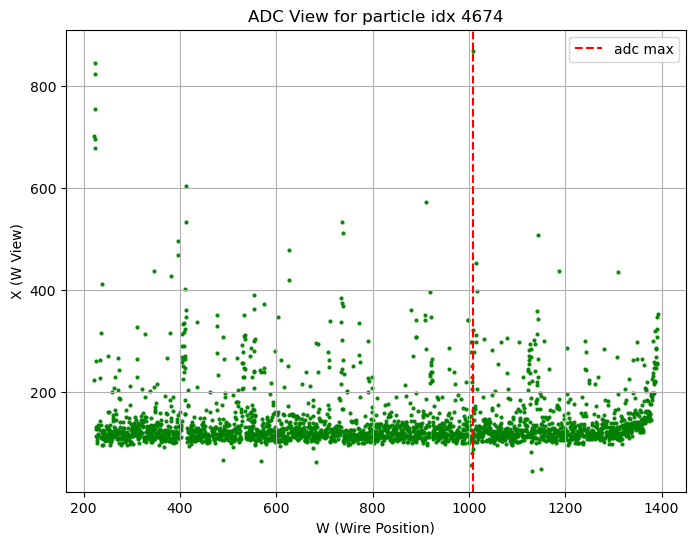

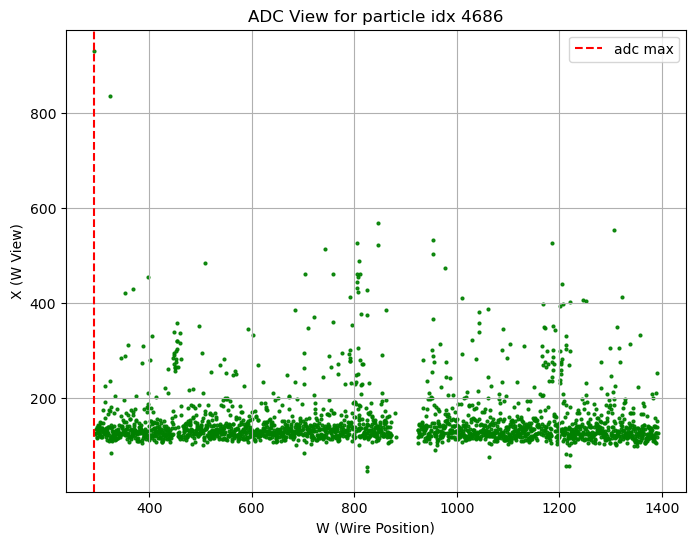

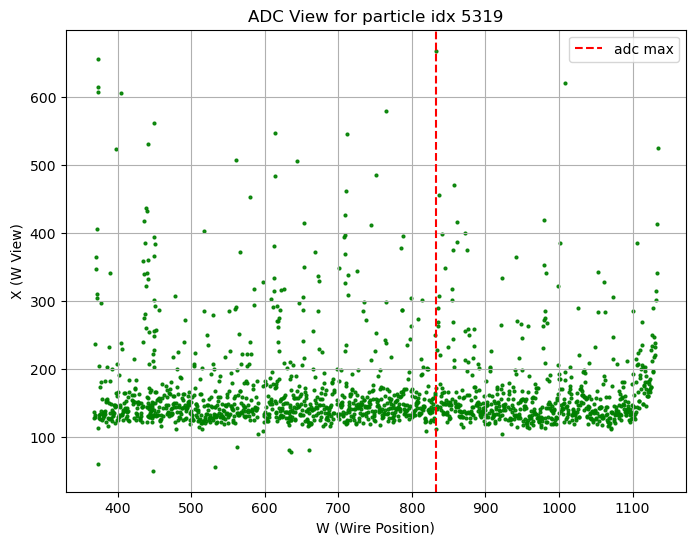

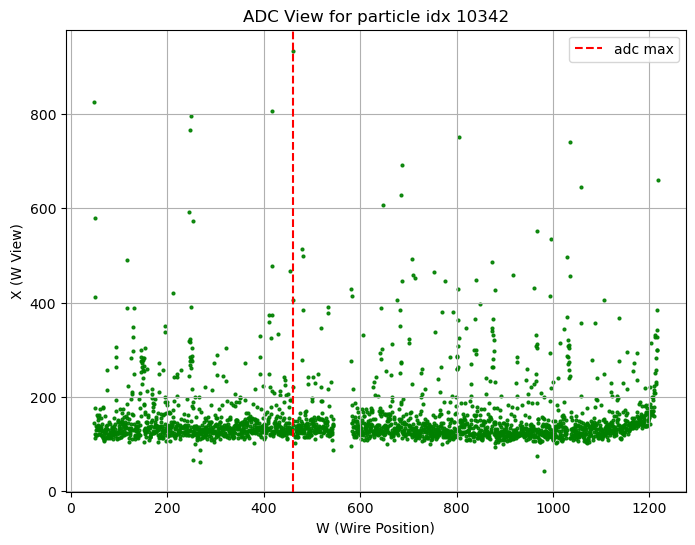

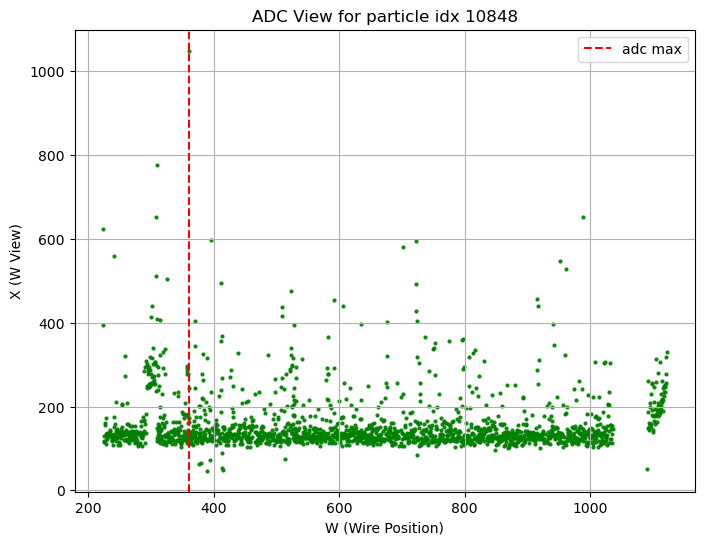

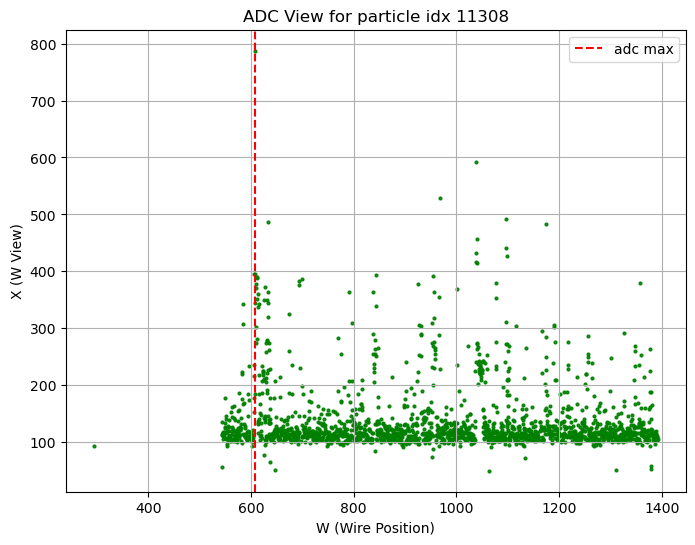

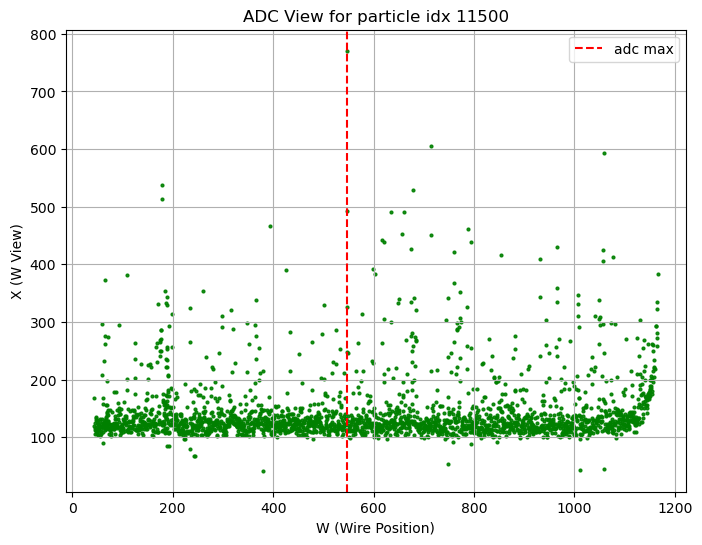

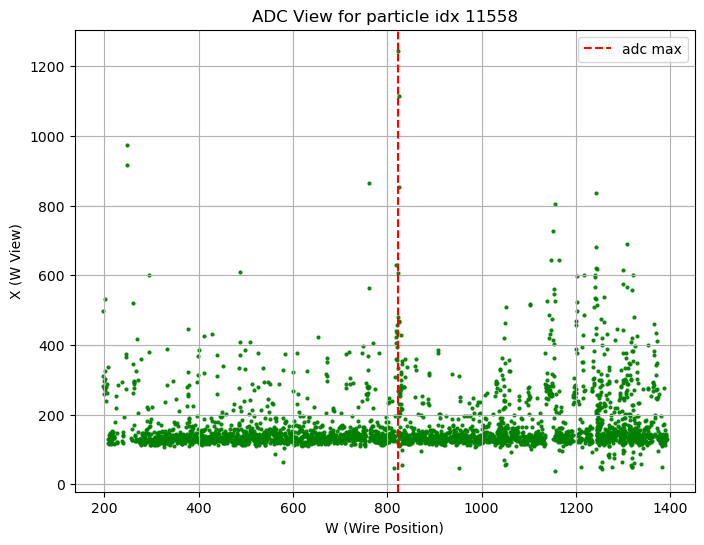

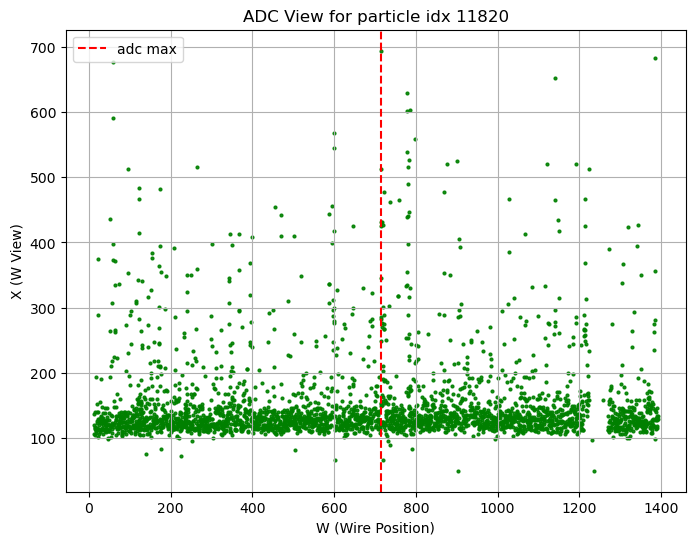

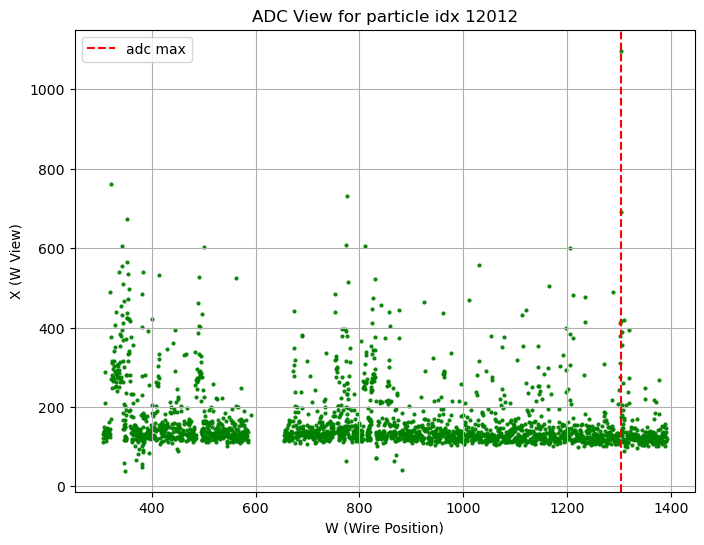

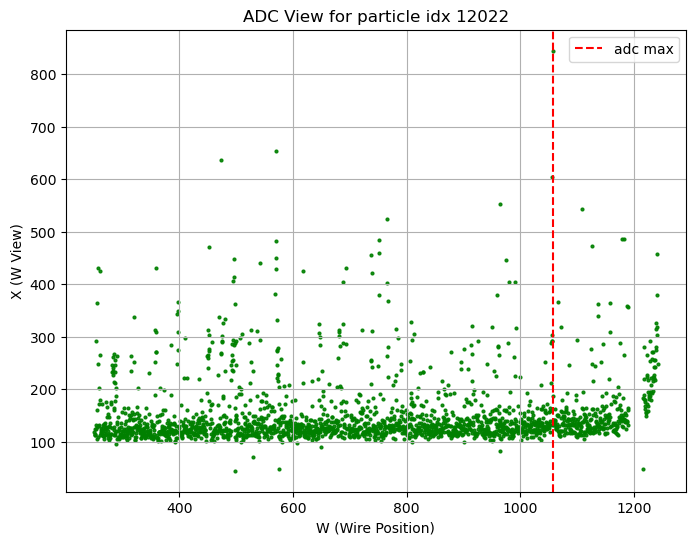

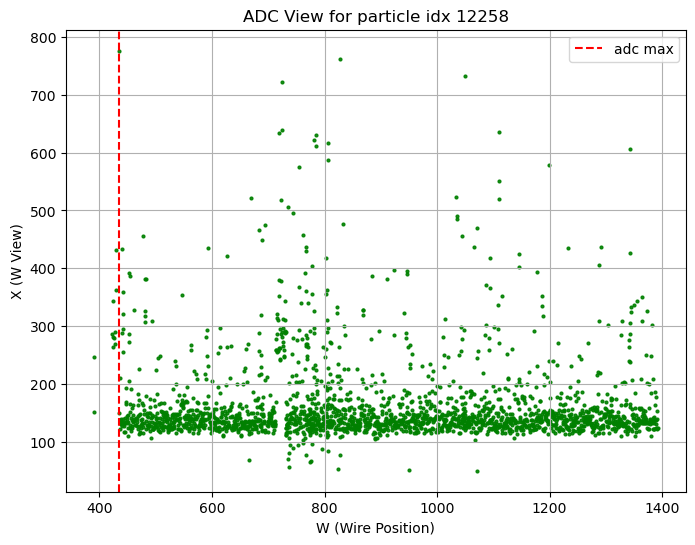

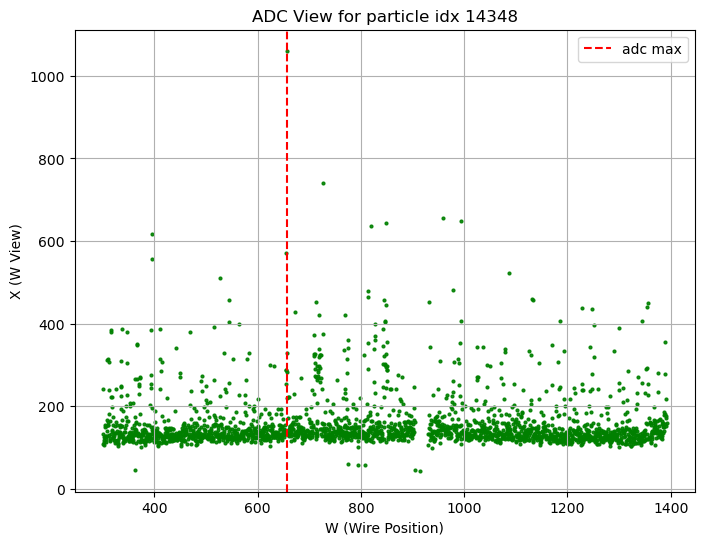

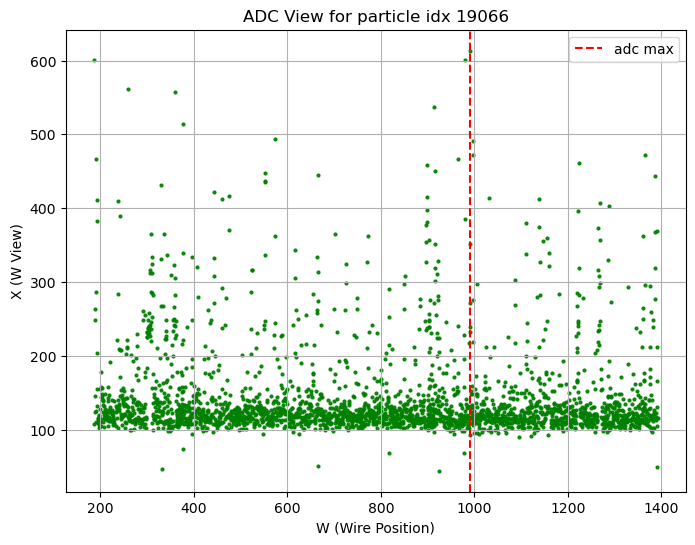

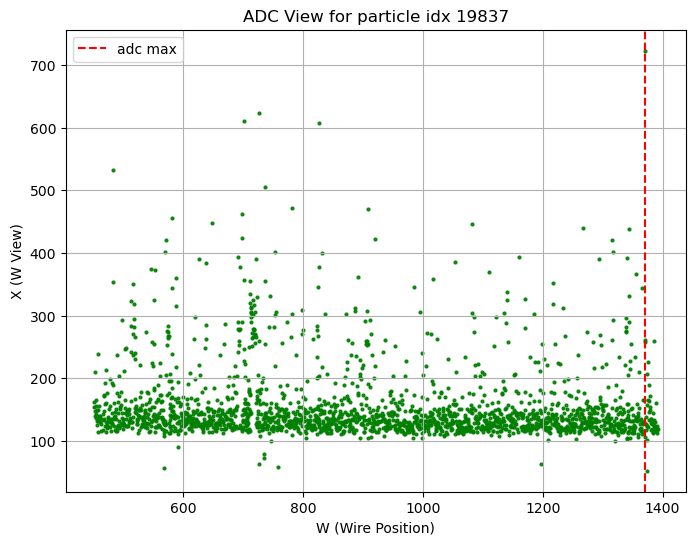

In [5]:
def adcs_plot_idx(events, event_idx):
    
    # finding x/w hits again for a single event
    w_hits = events.reco_hits_w[event_idx]
    adc_values = events.reco_adcs_w[event_idx]
    adc_max = max(adc_values)

    max_idx = np.where(adc_values == adc_max)[0][0]

    if len(w_hits) > 5:
        plt.figure(figsize = (8,6))
        plt.scatter(w_hits, adc_values, c='g', s=4, alpha=0.9) # scatter plot
        plt.axvline(w_hits[max_idx], c='r', linestyle='--', label='adc max')
        plt.title(f'ADC View for particle idx {event_idx}')
        plt.ylabel('X (W View)')
        plt.xlabel('W (Wire Position)')
        plt.grid(True)
        plt.legend()
        plt.show()
    else: return print('Less that 5 hits in event, not sufficient to plot.')

for i in track_idx:
    adcs_plot_idx(cheated_0, i)

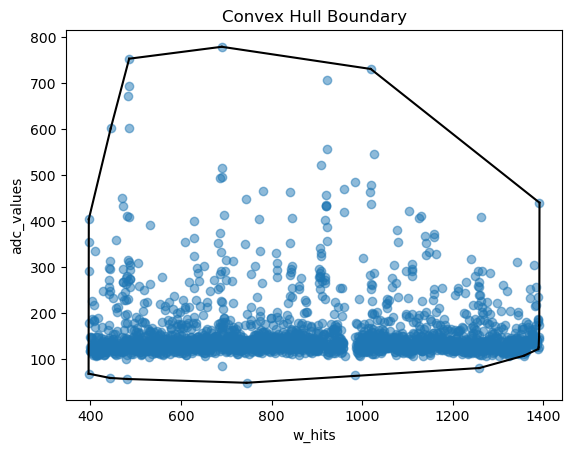

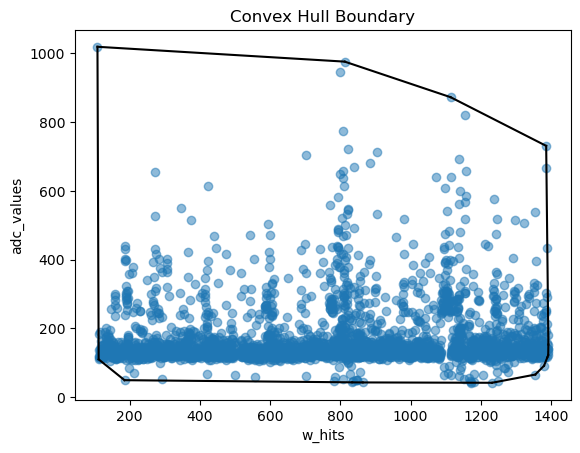

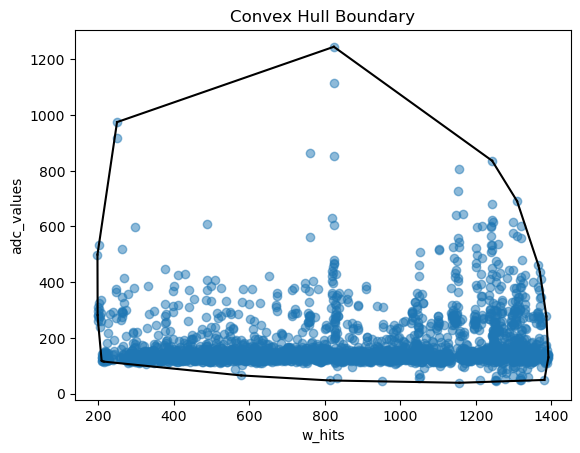

In [6]:
import random
for i in random.sample(track_idx, 3):
    w_hits = cheated_0.reco_hits_w[i]
    adc_values = cheated_0.reco_adcs_w[i]
    points = np.column_stack((w_hits, adc_values))
    
    from scipy.spatial import ConvexHull
    
    # Create Convex Hull
    hull = ConvexHull(points)
    
    # Plot the points and the Convex Hull boundary
    plt.scatter(w_hits, adc_values, alpha=0.5)
    for simplex in hull.simplices:
        plt.plot(points[simplex, 0], points[simplex, 1], 'k-')  # boundary in black
    
    plt.xlabel("w_hits")
    plt.ylabel("adc_values")
    plt.title("Convex Hull Boundary")
    plt.show()

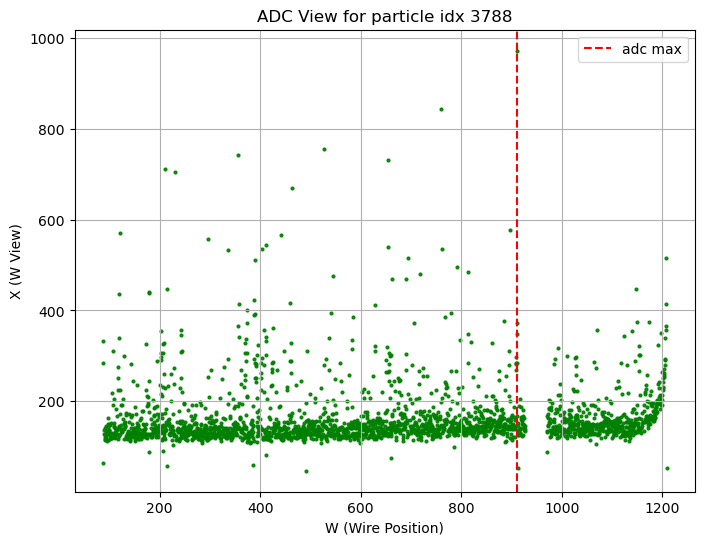

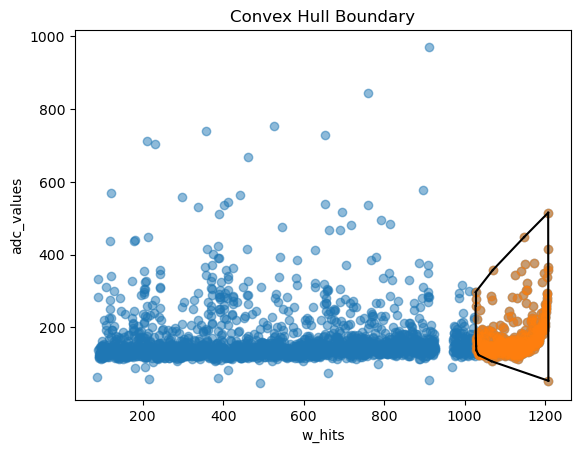

In [7]:
adcs_plot_idx(cheated_0, 3788)

from scipy.spatial import ConvexHull

def bragg_hull_1(events, event_idx):
    w_hits = events.reco_hits_w[event_idx]
    adc_values = events.reco_adcs_w[event_idx]
    points = np.column_stack((w_hits, adc_values))

    # want to shave some points off, will firstly look at the latter 85% of w hits
    w_max = max(w_hits)
    filtered_points  = [point for point in points if point[0] > 0.85 * w_max]
    filtered_points  = np.array(filtered_points)
    
    # Create Convex Hull
    hull = ConvexHull(filtered_points )
    
    # Plot the points and the Convex Hull boundary
    plt.scatter(w_hits, adc_values, alpha=0.5)
    plt.scatter(filtered_points[:, 0], filtered_points[:, 1], alpha=0.5)
    for simplex in hull.simplices:
        plt.plot(filtered_points [simplex, 0], filtered_points [simplex, 1], 'k-')  # boundary in black
    
    plt.xlabel("w_hits")
    plt.ylabel("adc_values")
    plt.title("Convex Hull Boundary")
    plt.show()

bragg_hull_1(cheated_0, 3788)

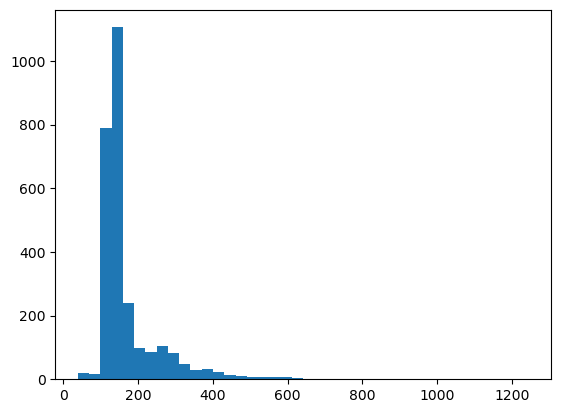

In [8]:
# quickly look at the distribution of adcs within a track.

def adc_dist(events, event_idx):
    adc_values = events.reco_adcs_w[i]

    plt.hist(adc_values, bins=40)
    plt.show()

adc_dist(cheated_0, 3788)

# arbitratily, for this event we can make an adc cut at about 100 eV

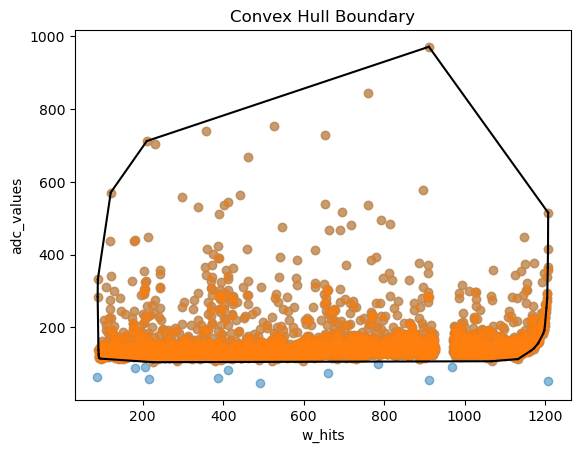

In [9]:
def bragg_hull_2(events, event_idx):
    w_hits = events.reco_hits_w[event_idx]
    adc_values = events.reco_adcs_w[event_idx]
    points = np.column_stack((w_hits, adc_values))

    # want to shave some points off, will now look at adcs > 100 as above - again this is arbitrary and just proof of concept
    w_max = max(w_hits)
    filtered_points  = np.array([point for point in points if point[1] > 100])
    
    # Create Convex Hull
    hull = ConvexHull(filtered_points )

    # Sort hull vertices by x-coordinate (w_hits) to ensure they are ordered left-to-right
    hull_points = filtered_points[hull.vertices]
    hull_points = hull_points[np.argsort(hull_points[:, 0])]
    
    # Plot the points and the Convex Hull boundary
    plt.scatter(w_hits, adc_values, alpha=0.5)
    plt.scatter(filtered_points[:, 0], filtered_points[:, 1], alpha=0.5)
    for simplex in hull.simplices:
        plt.plot(filtered_points [simplex, 0], filtered_points [simplex, 1], 'k-')  # boundary in black
    
    plt.xlabel("w_hits")
    plt.ylabel("adc_values")
    plt.title("Convex Hull Boundary")
    plt.show()

bragg_hull_2(cheated_0, 3788)

3.0294929842642015, 0.013647725839619367


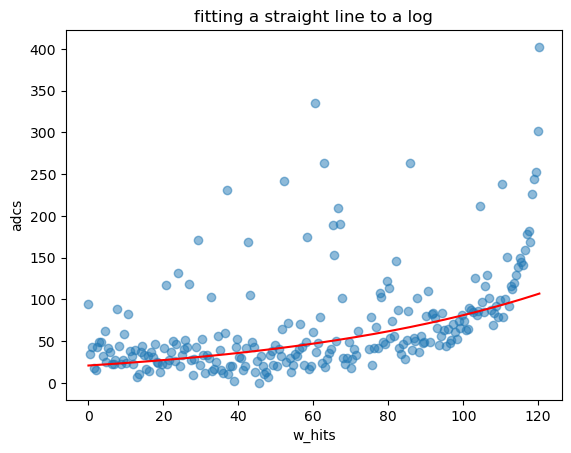

In [10]:
# what about we just fix a curve to the final part?

def bragg_exp(events, event_idx):
    w_hits = events.reco_hits_w[event_idx]
    adc_values = events.reco_adcs_w[event_idx]
    points = np.column_stack((w_hits, adc_values))

    # filter last 90% hits, adcs > 100
    w_max = max(w_hits)
    filtered_points  = np.array([point for point in points if point[1] > 100 and point[0] > 0.9 * w_max])
    
    w = filtered_points[:, 0]
    w = w - min(w)
    adc = filtered_points[:, 1]
    adc = adc - min(adc) + 1e-5

    # Log-transform the adc values
    adc_log = np.log(adc)

    # Use np.polyfit to fit a line to log(adc) vs w
    coeffs = np.polyfit(w, adc_log, 1)

    a = coeffs[1]
    b = coeffs[0]
    print(f'{a}, {b}')
    
    # Plot the points and the Convex Hull boundary
    #plt.scatter(w_hits, adc_values, alpha=0.5)
    plt.scatter(w, adc, alpha=0.5)

    plt.plot(w, np.exp(a + b*np.array(w)), color='red', label="Exponential Fit")
    
    plt.xlabel("w_hits")
    plt.ylabel("adcs")
    plt.title("fitting a straight line to a log")
    plt.show()

bragg_exp(cheated_0, 3788)

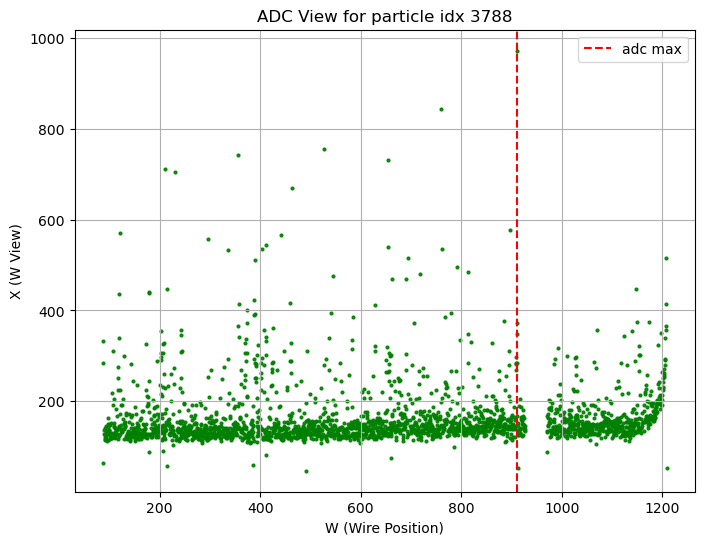

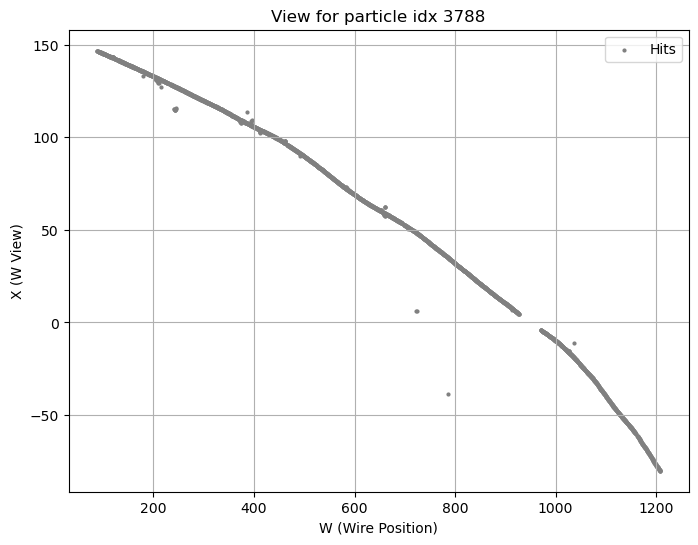

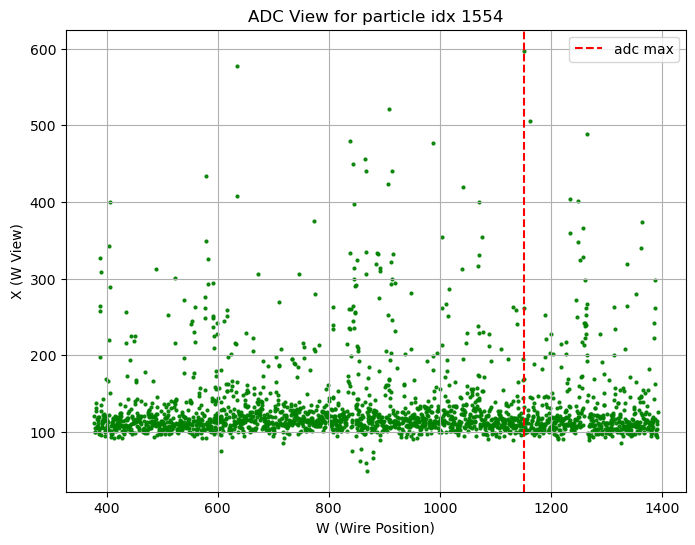

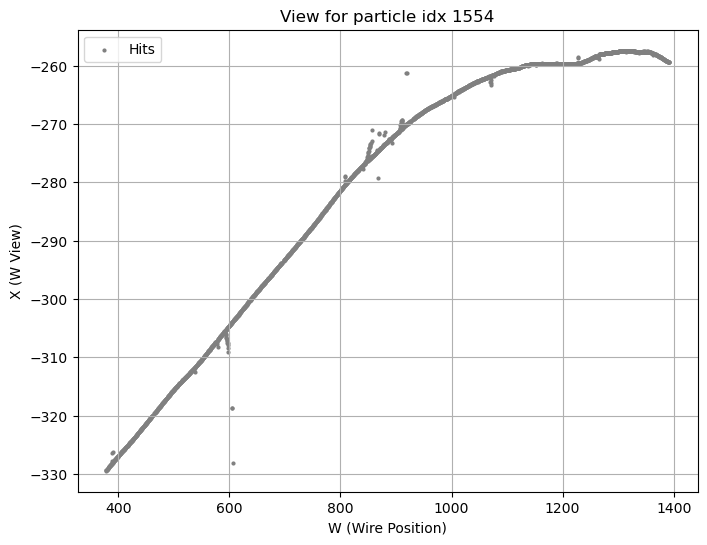

In [11]:
adcs_plot_idx(cheated_0, 3788)
f.plot_idx(cheated_0, 3788)
adcs_plot_idx(cheated_0, 1554)
f.plot_idx(cheated_0, 1554)